<a href="https://colab.research.google.com/github/amineceyda/Data-Analysis-Intro/blob/main/Airbnb_NYC_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
from tabulate import tabulate
import folium #For map
from numpy.polynomial.polynomial import polyfit

step 0: Set figure size

In [96]:
sns.set(rc={'figure.figsize':(28,10)})

Step 1: Collect the data
[New York City Airbnb Open Data](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data)


In [97]:
data_url = '/content/AB_NYC_2019.csv'
df_ab_nyc= pd.read_csv(data_url)
df_ab_nyc.head() # test

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Step 2: Clean data


*   Check for missing values
*   Look for any duplicate rows
*Examine the data types of each column and convert them if necessary



In [98]:
df_ab_nyc.info()
#just want to see the information of the column
#df_ab_nyc.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [99]:
#df_ab_nyc["room_type"]
df_ab_nyc["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [100]:
df_ab_nyc["room_type"].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [101]:
## Check for missing values
print(df_ab_nyc.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


Based on the result, we have identified the columns with missing values:

'name' has 16 missing values.
'host_name' has 21 missing values.
'last_review' has 10,052 missing values.
'reviews_per_month' has 10,052 missing values.

>For columns 'name' and 'host_name':

Since these columns are text-based and only have a few missing values, we can choose to drop the rows with missing values since they are not crucial for the analysis.
>For columns 'last_review' and 'reviews_per_month':

Dropping these rows could result in significant data loss.
Instead of dropping the rows, it might be more reasonable to keep the missing values and proceed with the analysis, especially if other columns in those rows provide valuable insights.

In [102]:
df_cleaned = df_ab_nyc.dropna(subset=['name', 'host_name'])

In [103]:
#Check for duplicate rows
duplicates = df_cleaned.duplicated()
num_duplicates = duplicates.sum()
print("Number of duplicate rows before removal:", num_duplicates)
duplicate_rows = df_cleaned[duplicates]
print(duplicate_rows)
df_cleaned = df_cleaned.drop_duplicates()#drop the duplicate rows from the DataFrame
duplicates_after_removal = df_cleaned.duplicated().sum()#Verify that duplicates have been removed
print("Number of duplicate rows after removal:", duplicates_after_removal)

Number of duplicate rows before removal: 0
Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []
Number of duplicate rows after removal: 0


Based on the df_ab_nyc.info() output,overview of the data types of each column:

* Integer type (int64): 'id', 'host_id', 'price', 'minimum_nights', 'number_of_reviews' 'calculated_host_listings_count', 'availability_365'
* Float type (float64): 'latitude', 'longitude', 'reviews_per_month'
* Object type (object): 'name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review

In [104]:
#Examine the data types of each column and convert them if necessary
#Let's convert 'last_review' to datetime data type:
df_cleaned['last_review'] = pd.to_datetime(df_cleaned['last_review'].copy())

In [105]:
df_cleaned.info() #test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48858 non-null  int64         
 1   name                            48858 non-null  object        
 2   host_id                         48858 non-null  int64         
 3   host_name                       48858 non-null  object        
 4   neighbourhood_group             48858 non-null  object        
 5   neighbourhood                   48858 non-null  object        
 6   latitude                        48858 non-null  float64       
 7   longitude                       48858 non-null  float64       
 8   room_type                       48858 non-null  object        
 9   price                           48858 non-null  int64         
 10  minimum_nights                  48858 non-null  int64         
 11  nu

In [106]:
#Data Subset // Example
#df_cleaned = df_cleaned[df_cleaned['neighbourhood_group'] == 'Manhattan']
#df_cleaned.head()

In [107]:
#Create a new feature 'price_per_night' //Example
#df_cleaned['price_per_night'] = df_cleaned['price'] / df_cleaned['minimum_nights']
#df_cleaned.head()

In [108]:
#Save Cleaned Data
df_cleaned.to_csv('cleaned_data.csv', index=False)

Step 3: Data Analsis

3.1 : Data Summary :  a summary of the dataset, including the total number of entries, the number of non-null values for each column, and the data types of - each column.

In [109]:
data_summary = df_cleaned.info() # Data Summary
print(data_summary) # Display the Data Summary

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48858 non-null  int64         
 1   name                            48858 non-null  object        
 2   host_id                         48858 non-null  int64         
 3   host_name                       48858 non-null  object        
 4   neighbourhood_group             48858 non-null  object        
 5   neighbourhood                   48858 non-null  object        
 6   latitude                        48858 non-null  float64       
 7   longitude                       48858 non-null  float64       
 8   room_type                       48858 non-null  object        
 9   price                           48858 non-null  int64         
 10  minimum_nights                  48858 non-null  int64         
 11  nu

3.2 : Missing Data Analysis : Investigate the columns with missing data (e.g., 'name', 'host_name', 'last_review', 'reviews_per_month') and determine the percentage of missing values for each column.

In [110]:
missing_data_percentage = df_cleaned.isnull().mean() * 100 # Missing Data Analysis
columns_with_missing_data = missing_data_percentage[missing_data_percentage > 0] # Filter columns with missing data
# Display the percentage of missing values for each column
print("Percentage of missing values for each column:")
print(columns_with_missing_data)

Percentage of missing values for each column:
last_review          20.543207
reviews_per_month    20.543207
dtype: float64


3.3 : Room Type Distribution: a visualization (e.g., a bar chart) to show the distribution of different room types ('room_type') available in the dataset.

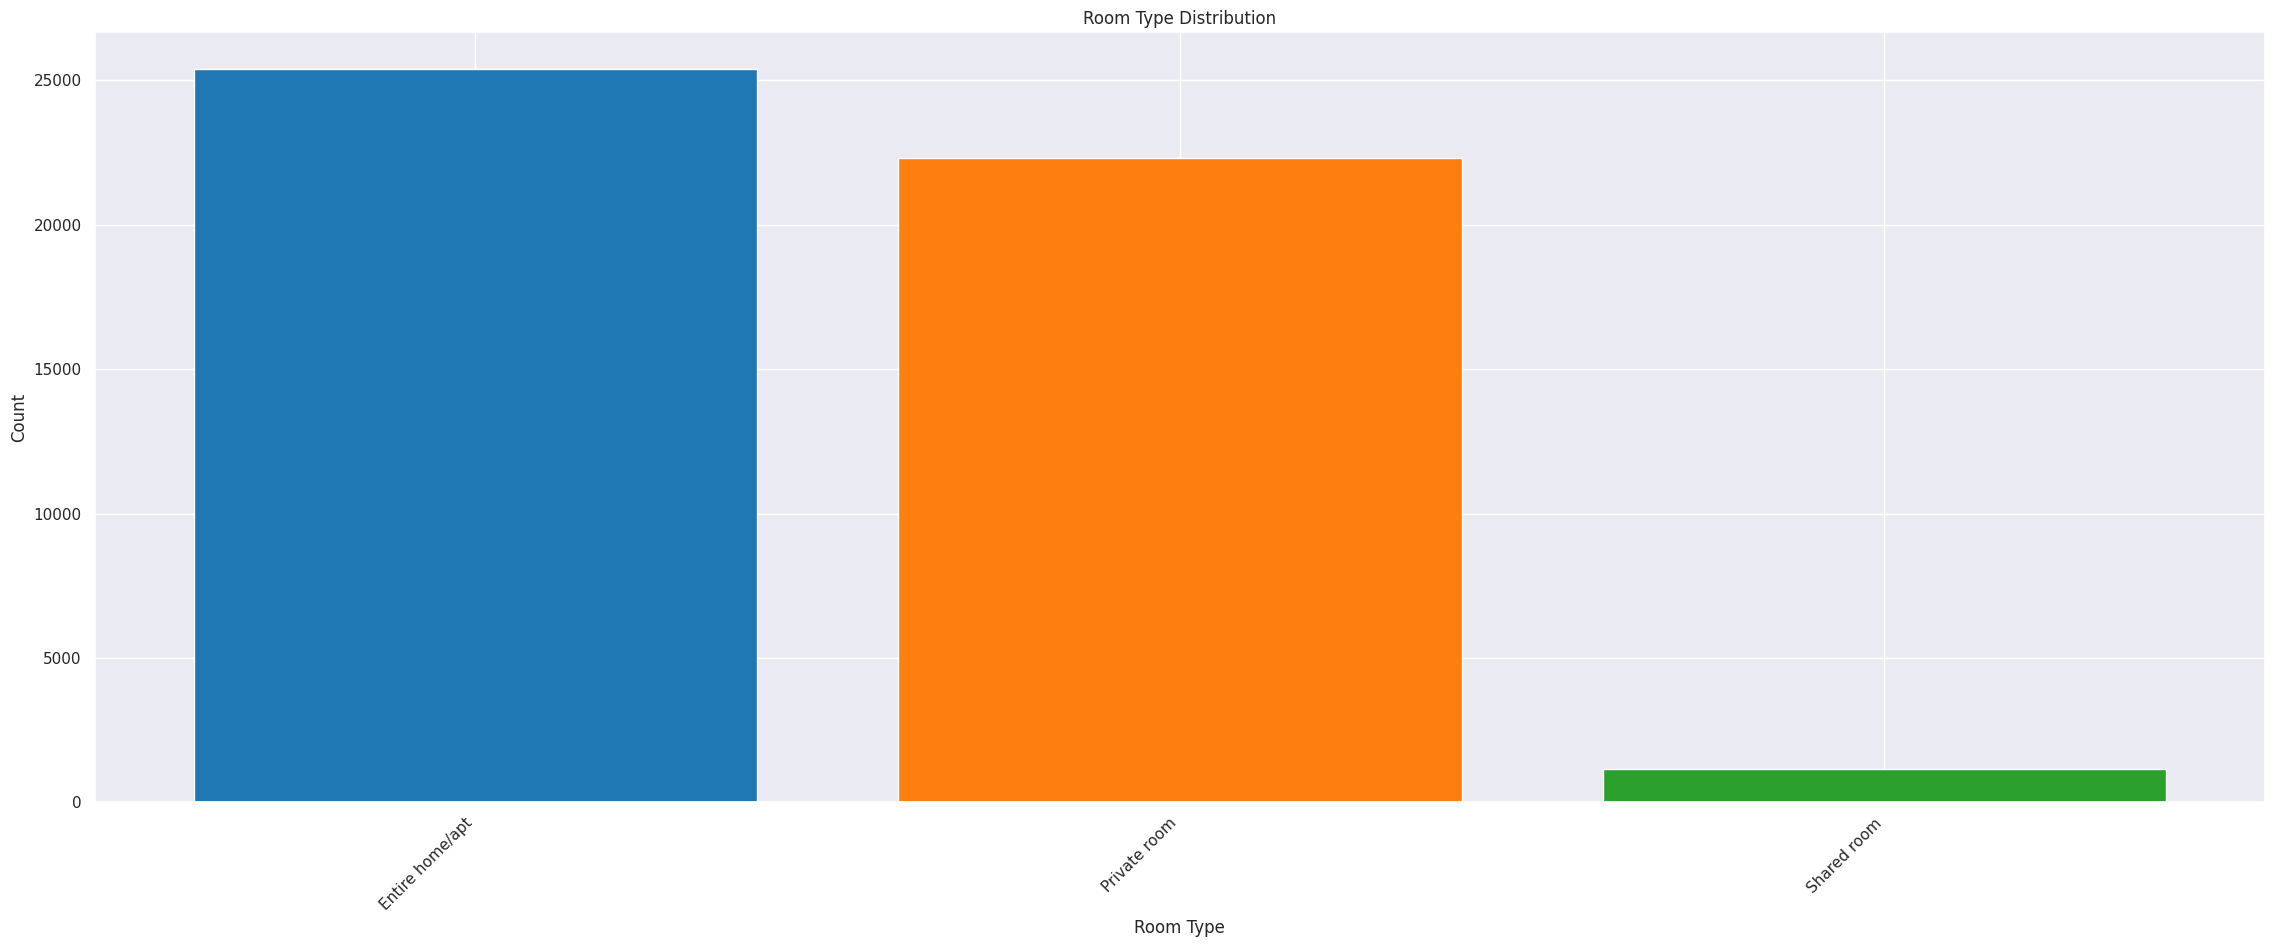

In [111]:
room_type_counts = df_cleaned['room_type'].value_counts() ## Room Type Distribution Visualization

custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] #custom colors for each room type
# Create a bar chart
plt.bar(room_type_counts.index, room_type_counts.values,color=custom_colors)
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Room Type Distribution')
plt.xticks(rotation=45, ha='right')

# Display the bar chart
plt.show()

3.4 : Price Analysis: Calculate the average, minimum, and maximum prices of the listings in the dataset.Visualize the price distribution using a histogram or box plot. Analyze if there are any outliers in the price data.

In [112]:
# Price Analysis
average_price = df_cleaned['price'].mean()
minimum_price = df_cleaned['price'].min()
maximum_price = df_cleaned['price'].max()

print("Average Price:", average_price)
print("Minimum Price:", minimum_price)
print("Maximum Price:", maximum_price)


Average Price: 152.74030864955586
Minimum Price: 0
Maximum Price: 10000


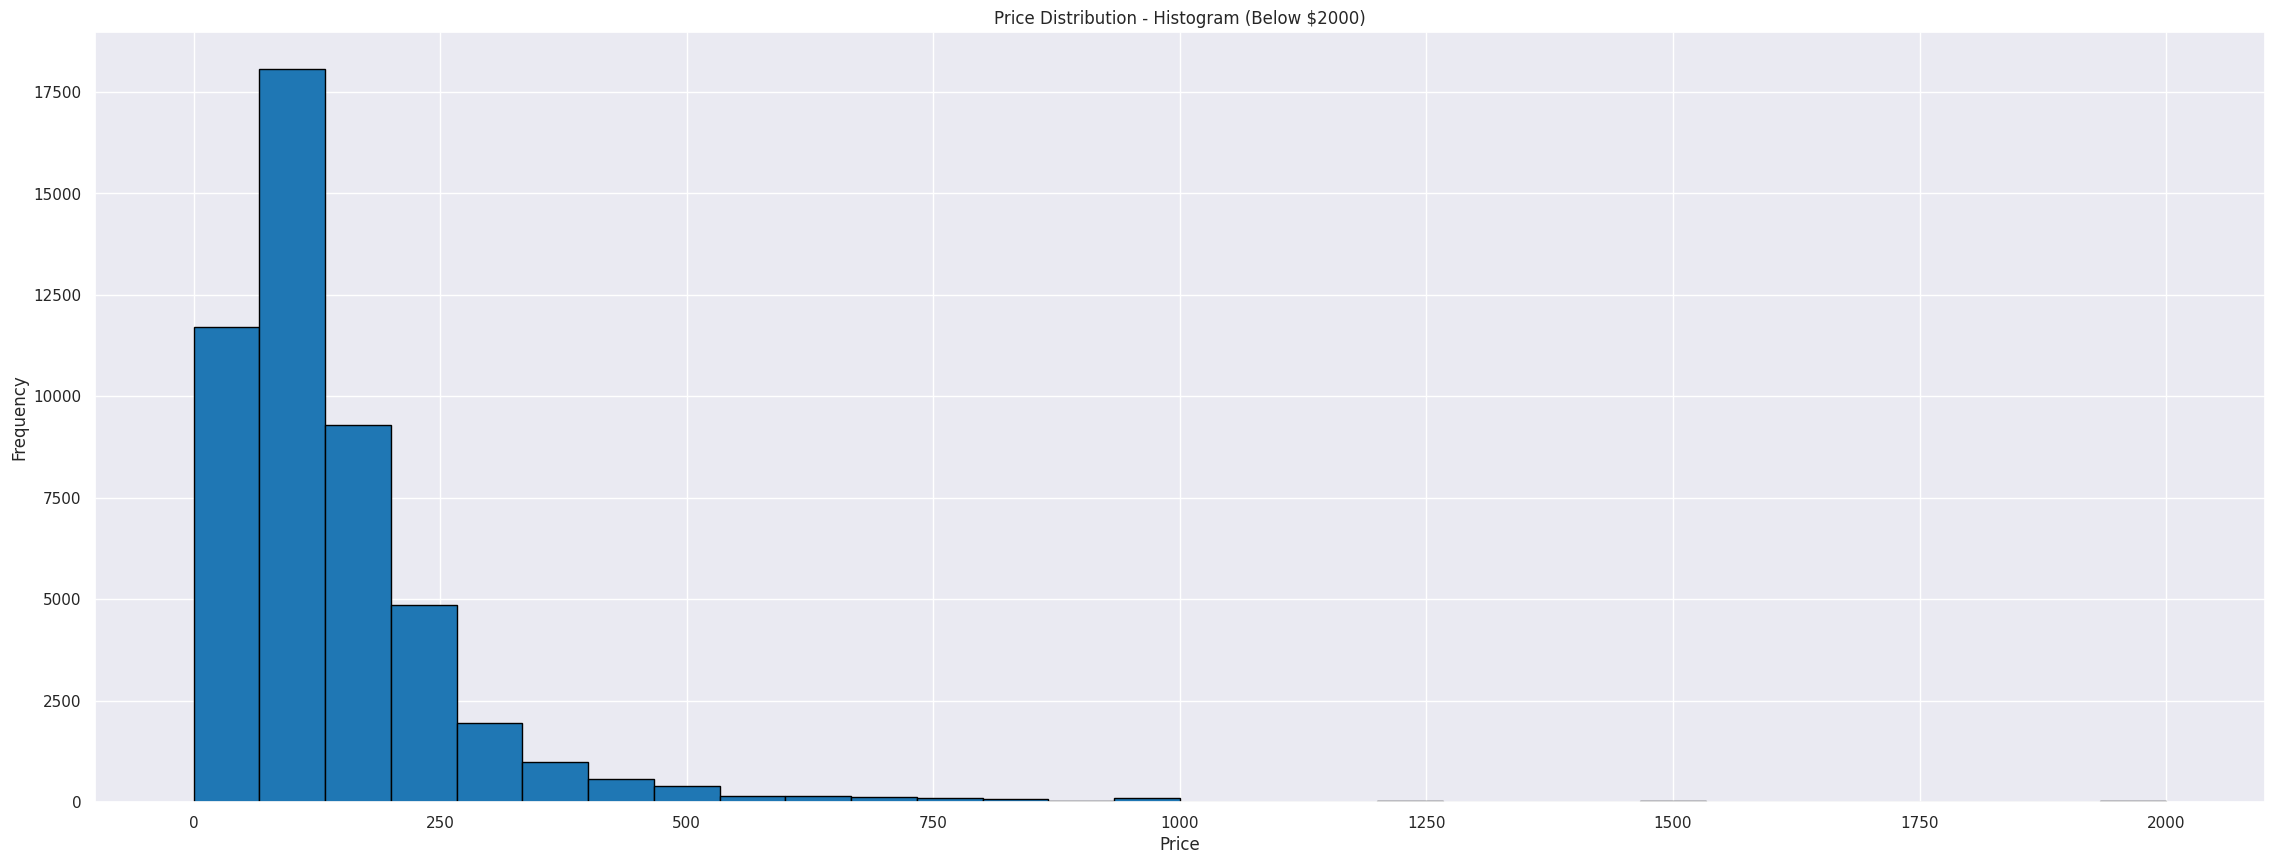

In [113]:
# Filter the data to exclude prices above $2000
filtered_prices = df_cleaned[df_cleaned['price'] <= 2000]

# Plot the filtered price distribution using a histogram
plt.hist(filtered_prices['price'], bins=30, color='#1f77b4', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution - Histogram (Below $2000)')
plt.grid(True)

# Display the histogram
plt.show()

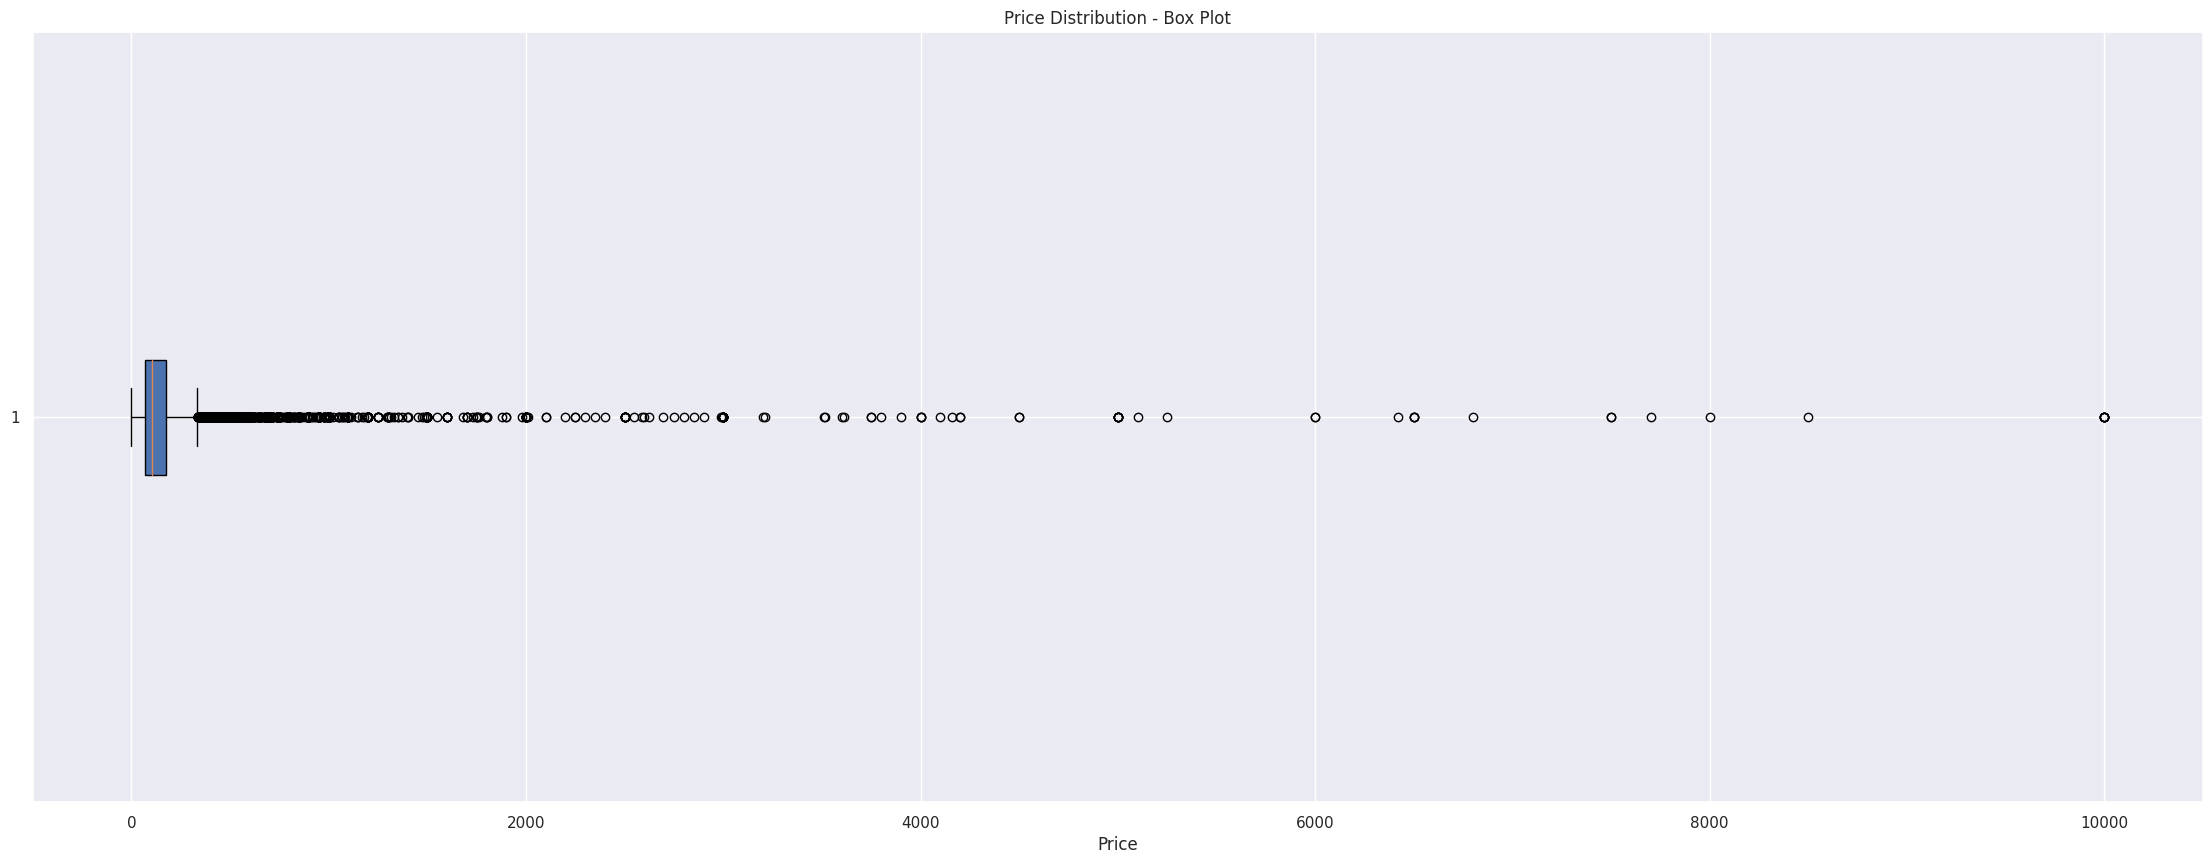

In [114]:
# Price Distribution Visualization (Box Plot)
plt.boxplot(df_cleaned['price'], vert=False, patch_artist=True)
plt.xlabel('Price')
plt.title('Price Distribution - Box Plot')
plt.grid(True)

# Display the box plot
plt.show()

3.5 : Reviews Analysis: Analyze the number of reviews per listing ('number_of_reviews') and the average number of reviews per month ('reviews_per_month'). Identify the listings with the highest and lowest numbers of reviews.

In [115]:
# Reviews Analysis
total_reviews_per_listing = df_cleaned['number_of_reviews']
average_reviews_per_month = df_cleaned['reviews_per_month'].mean()

In [116]:
# Identify listings with the highest and lowest numbers of reviews
listing_with_highest_reviews = df_cleaned[df_cleaned['number_of_reviews'] == total_reviews_per_listing.max()]
listing_with_lowest_reviews = df_cleaned[df_cleaned['number_of_reviews'] == total_reviews_per_listing.min()]

In [117]:
# Display the results as a table using tabulate
reviews_summary = pd.DataFrame({
    'Statistic': ['Total Reviews', 'Average Reviews per Month'],
    'Value': [total_reviews_per_listing.describe()['count'], average_reviews_per_month]
})

highest_review_listing = pd.DataFrame({
    'Listing Name': listing_with_highest_reviews['name'],
    'Number of Reviews': listing_with_highest_reviews['number_of_reviews']
})

lowest_review_listing = pd.DataFrame({
    'Listing Name': listing_with_lowest_reviews['name'],
    'Number of Reviews': listing_with_lowest_reviews['number_of_reviews']
})

In [118]:
print("Reviews Summary:")
print(tabulate(reviews_summary, headers='keys', tablefmt='grid', showindex=False))

Reviews Summary:
+---------------------------+-------------+
| Statistic                 |       Value |
+===========================+=============+
| Total Reviews             | 48858       |
+---------------------------+-------------+
| Average Reviews per Month |     1.37323 |
+---------------------------+-------------+


In [119]:
print("\nListing with the Highest Number of Reviews:")
print(tabulate(highest_review_listing, headers='keys', tablefmt='grid', showindex=False))


Listing with the Highest Number of Reviews:
+-------------------------+---------------------+
| Listing Name            |   Number of Reviews |
+=========================+=====================+
| Room near JFK Queen Bed |                 629 |
+-------------------------+---------------------+


In [120]:
print("\nTop 10 Listings with the Lowest Number of Reviews:")
print(tabulate(lowest_review_listing.head(10), headers='keys', tablefmt='grid', showindex=False))


Top 10 Listings with the Lowest Number of Reviews:
+---------------------------------------------------+---------------------+
| Listing Name                                      |   Number of Reviews |
+===================================================+=====================+
| THE VILLAGE OF HARLEM....NEW YORK !               |                   0 |
+---------------------------------------------------+---------------------+
| Huge 2 BR Upper East  Cental Park                 |                   0 |
+---------------------------------------------------+---------------------+
| Magnifique Suite au N de Manhattan - vue Cloitres |                   0 |
+---------------------------------------------------+---------------------+
| Clean and Quiet in Brooklyn                       |                   0 |
+---------------------------------------------------+---------------------+
| Country space in the city                         |                   0 |
+-----------------------------------

3.6: Location Analysis: Explore the distribution of listings across different neighborhoods ('neighbourhood') and 'neighbourhood_group'.
Visualize the geographical locations of the listings using a scatter plot on a map.

In [121]:
neighbourhood_group_counts = df_cleaned['neighbourhood_group'].value_counts()# Location Analysis - Count of Listings in Each Neighborhood Group
neighbourhood_counts = df_cleaned['neighbourhood'].value_counts() # Location Analysis - Count of Listings in Each Neighborhood


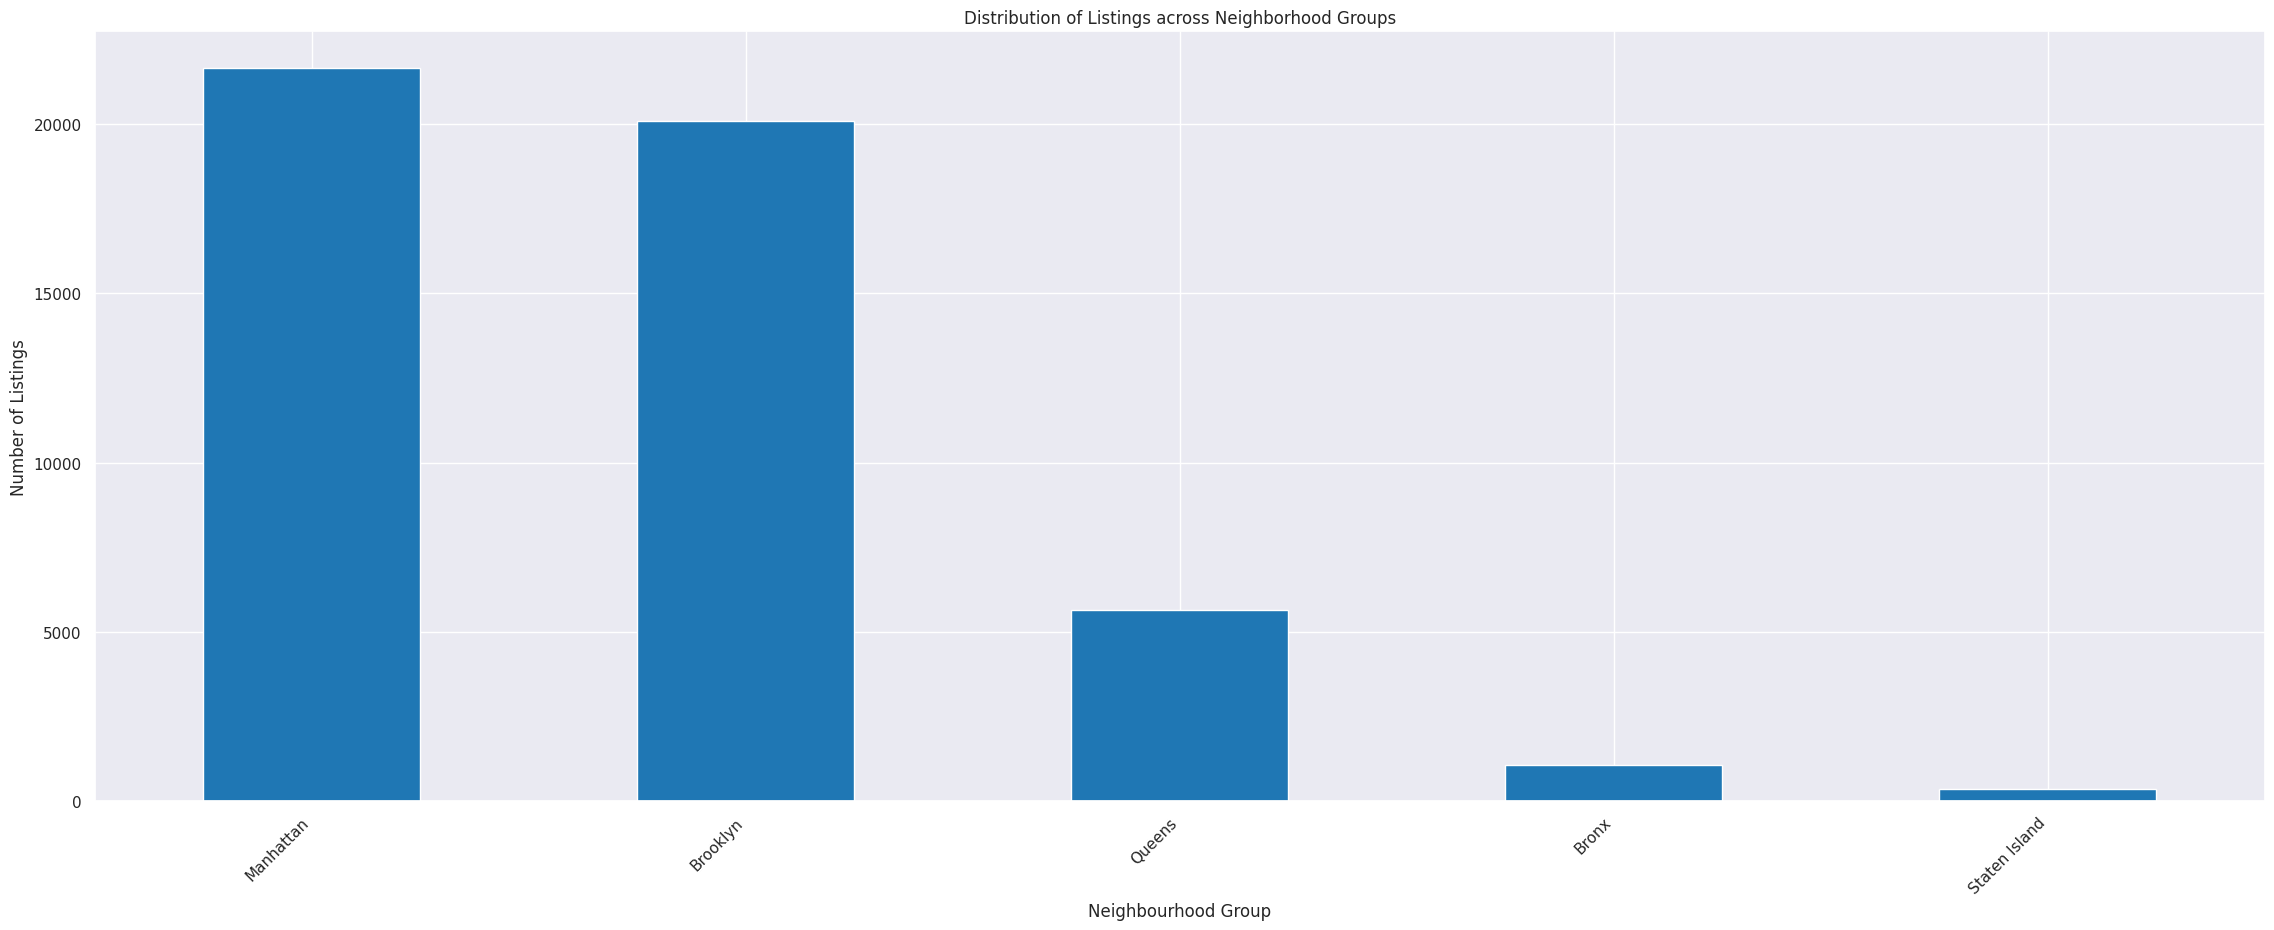

In [122]:
# Visualize the Distribution of Listings across Different Neighborhood Groups
neighbourhood_group_counts.plot(kind='bar', color='#1f77b4')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.title('Distribution of Listings across Neighborhood Groups')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

3.7: Host Analysis: Analyze the top hosts with the most listings('calculated_host_listings_count'). Identify the hosts with the most reviews and highest average review scores.

In [123]:
# Top Hosts with the Most Listings
top_hosts_listings = df_cleaned.groupby(['host_id', 'host_name'])['calculated_host_listings_count'].max()
top_hosts_listings = top_hosts_listings.sort_values(ascending=False).reset_index()
print("Top Hosts with the Most Listings:")
print(tabulate(top_hosts_listings.head(10), headers='keys', tablefmt='grid', showindex=False))


Top Hosts with the Most Listings:
+-----------+-------------------+----------------------------------+
|   host_id | host_name         |   calculated_host_listings_count |
+===========+===================+==================================+
| 219517861 | Sonder (NYC)      |                              327 |
+-----------+-------------------+----------------------------------+
| 107434423 | Blueground        |                              232 |
+-----------+-------------------+----------------------------------+
|  30283594 | Kara              |                              121 |
+-----------+-------------------+----------------------------------+
| 137358866 | Kazuya            |                              103 |
+-----------+-------------------+----------------------------------+
|  12243051 | Sonder            |                               96 |
+-----------+-------------------+----------------------------------+
|  16098958 | Jeremy & Laura    |                               96 |


In [124]:
# Hosts with the Most Reviews
hosts_most_reviews = df_cleaned.groupby(['host_id', 'host_name'])['number_of_reviews'].sum()
hosts_most_reviews = hosts_most_reviews.sort_values(ascending=False).reset_index()
print("\nHosts with the Most Reviews:")
print(tabulate(hosts_most_reviews.head(10), headers='keys', tablefmt='grid', showindex=False))


Hosts with the Most Reviews:
+-----------+--------------------------------+---------------------+
|   host_id | host_name                      |   number_of_reviews |
+===========+================================+=====================+
|  37312959 | Maya                           |                2273 |
+-----------+--------------------------------+---------------------+
|    344035 | Brooklyn&   Breakfast    -Len- |                2205 |
+-----------+--------------------------------+---------------------+
|  26432133 | Danielle                       |                2017 |
+-----------+--------------------------------+---------------------+
|  35524316 | Yasu & Akiko                   |                1971 |
+-----------+--------------------------------+---------------------+
|  40176101 | Brady                          |                1818 |
+-----------+--------------------------------+---------------------+
|   4734398 | Jj                             |                1798 |
+---

In [125]:
# Hosts with the Highest Average Review Scores
hosts_highest_review_scores = df_cleaned.groupby(['host_id', 'host_name'])['reviews_per_month'].mean()
hosts_highest_review_scores = hosts_highest_review_scores.sort_values(ascending=False).reset_index()
print("\nHosts with the Highest Average Review Scores:")
print(tabulate(hosts_highest_review_scores.head(10), headers='keys', tablefmt='grid', showindex=False))


Hosts with the Highest Average Review Scores:
+-----------+-------------+---------------------+
|   host_id | host_name   |   reviews_per_month |
+===========+=============+=====================+
| 228415932 | Louann      |             20.94   |
+-----------+-------------+---------------------+
| 244361589 | Row NYC     |             18.62   |
+-----------+-------------+---------------------+
| 156684502 | Nalicia     |             18.1267 |
+-----------+-------------+---------------------+
| 217379941 | Brent       |             15.78   |
+-----------+-------------+---------------------+
|  47621202 | Dona        |             13.99   |
+-----------+-------------+---------------------+
|  26432133 | Danielle    |             13.604  |
+-----------+-------------+---------------------+
| 256290334 | Aisling     |             13.42   |
+-----------+-------------+---------------------+
| 257832461 | Stephanie   |             13.33   |
+-----------+-------------+---------------------+
| 1

3.8: Seasonal Availability: Analyze the availability of listings throughout the year ('availability_365') and identify any seasonal patterns

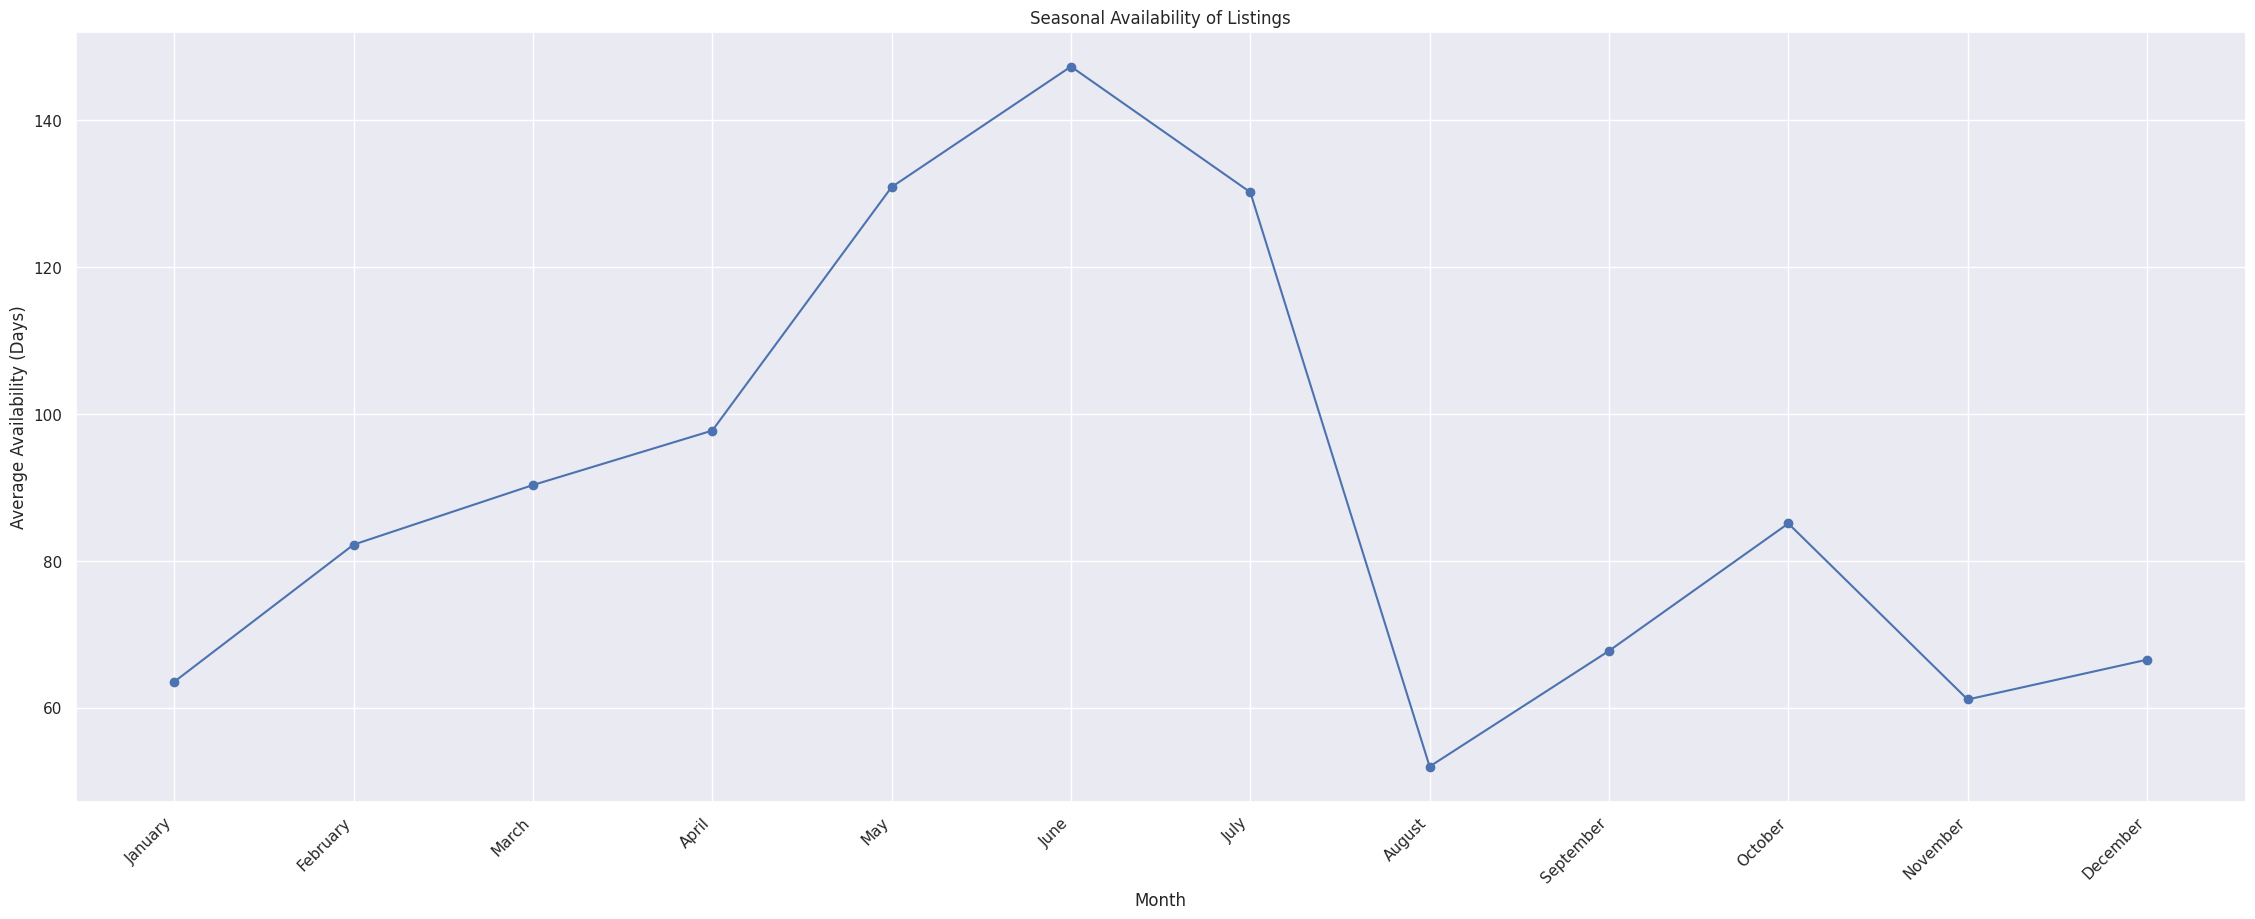

In [126]:
# Seasonal Availability Analysis
seasonal_availability = df_cleaned.groupby(df_cleaned['last_review'].dt.month)['availability_365'].mean()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Visualize Seasonal Availability
plt.plot(months, seasonal_availability, marker='o', linestyle='-', color='b')
plt.xlabel('Month')
plt.ylabel('Average Availability (Days)')
plt.title('Seasonal Availability of Listings')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.show()

3.9: Price Variation by Neighborhood: Analyze how the prices of listings vary across different neighborhoods. You can create box plots or bar charts to visualize the median or average price for each neighborhood.

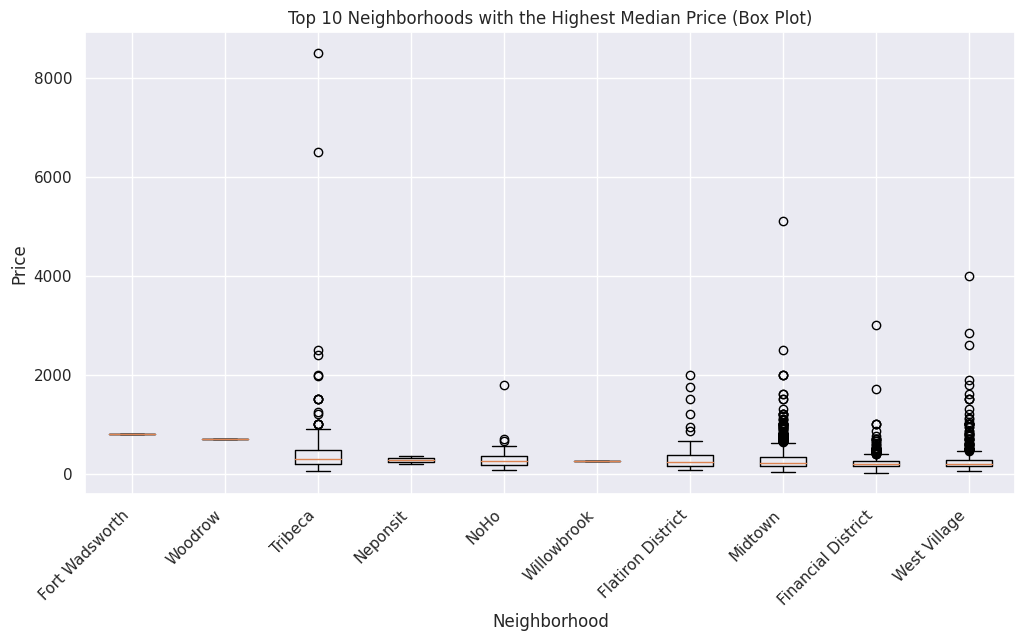

In [127]:
# Calculate the median and mean price for each neighborhood
neighborhood_price_stats = df_cleaned.groupby('neighbourhood')['price'].agg(['median', 'mean'])
neighborhood_price_stats = neighborhood_price_stats.sort_values(by='median', ascending=False)

# Choose the top N neighborhoods with highest median prices
top_n = 10  # we can change this to any number //if ı use all of them it look mess
top_neighborhoods = neighborhood_price_stats.nlargest(top_n, 'median').index

# Filter the DataFrame for the top N neighborhoods
df_top_neighborhoods = df_cleaned[df_cleaned['neighbourhood'].isin(top_neighborhoods)]

# Create the box plot for the top N neighborhoods
plt.figure(figsize=(12, 6))
plt.boxplot([df_top_neighborhoods[df_top_neighborhoods['neighbourhood'] == neighborhood]['price'] for neighborhood in top_neighborhoods], labels=top_neighborhoods)
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.title(f'Top {top_n} Neighborhoods with the Highest Median Price (Box Plot)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

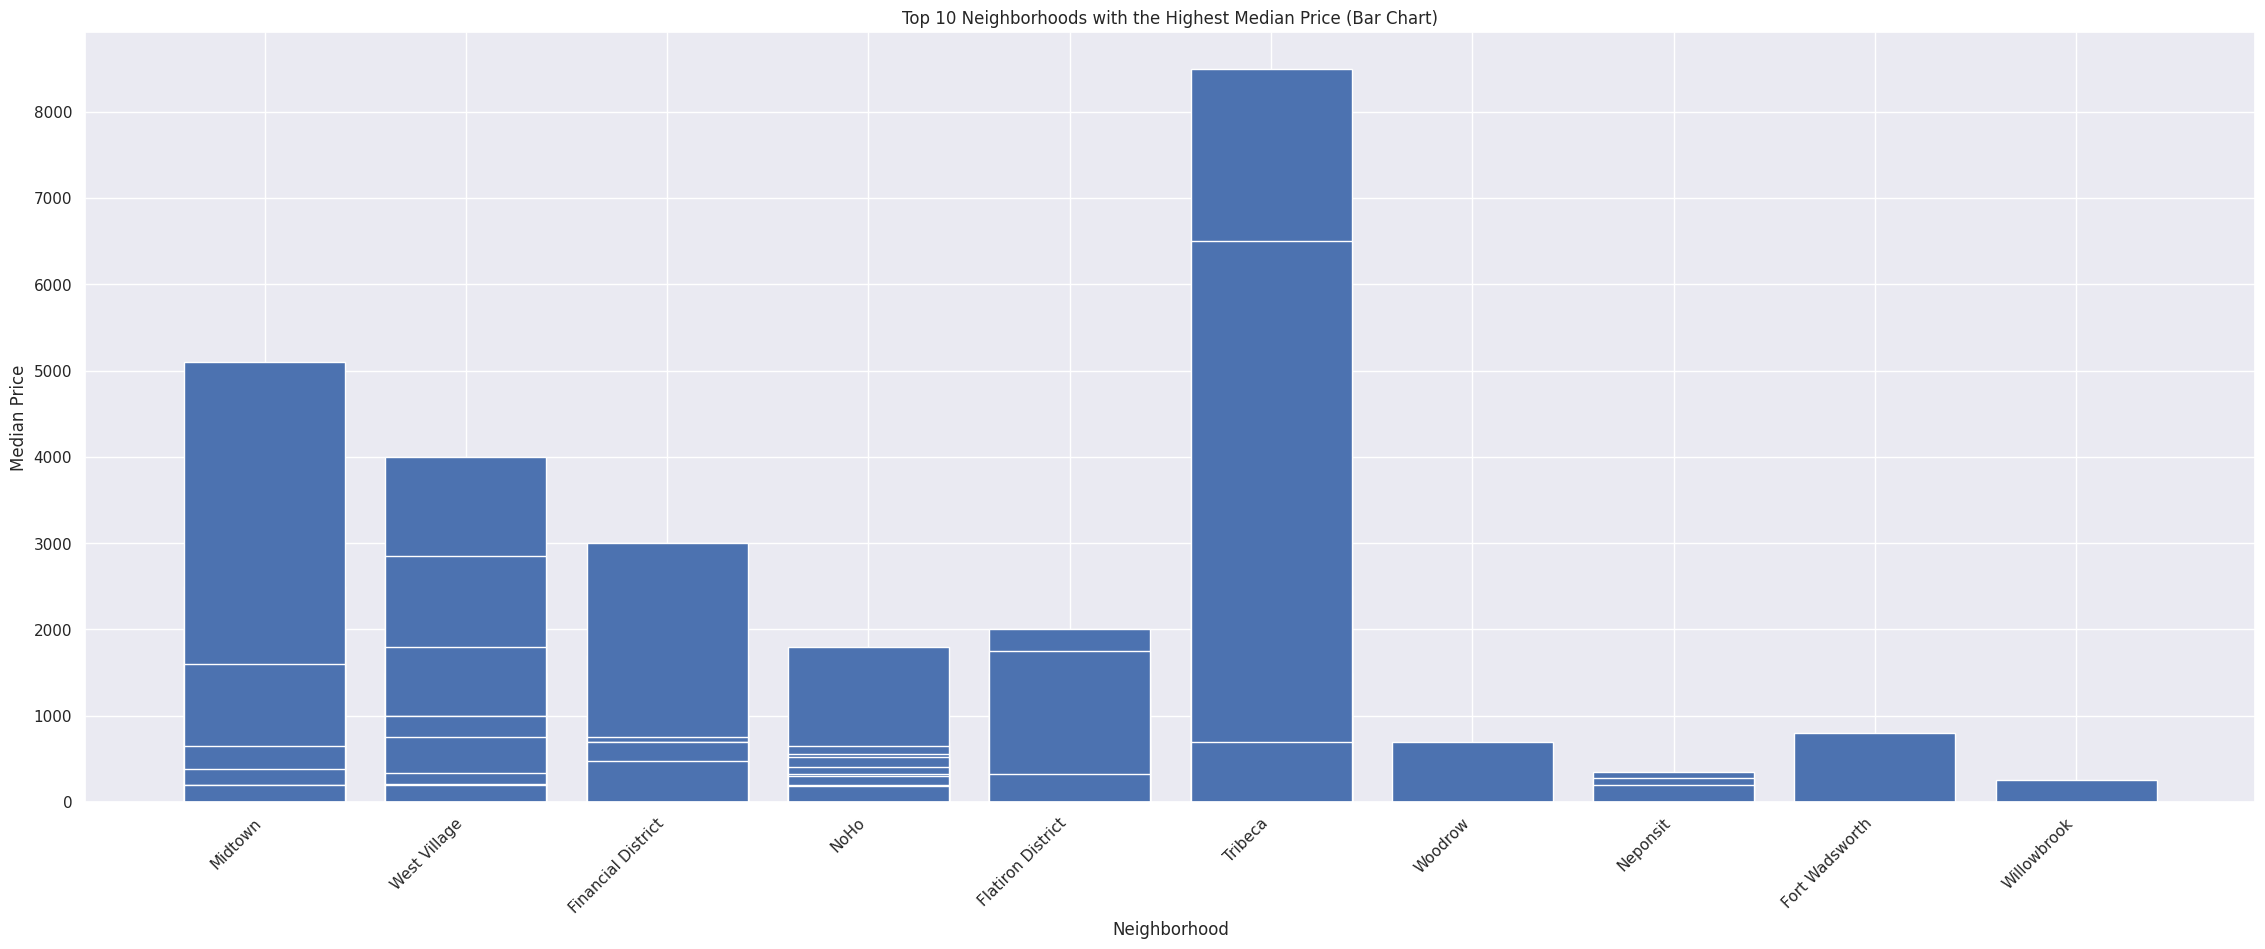

In [128]:
# Create the bar chart for the top N neighborhoods
plt.bar(df_top_neighborhoods['neighbourhood'], df_top_neighborhoods['price'])
plt.xlabel('Neighborhood')
plt.ylabel('Median Price')
plt.title(f'Top {top_n} Neighborhoods with the Highest Median Price (Bar Chart)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

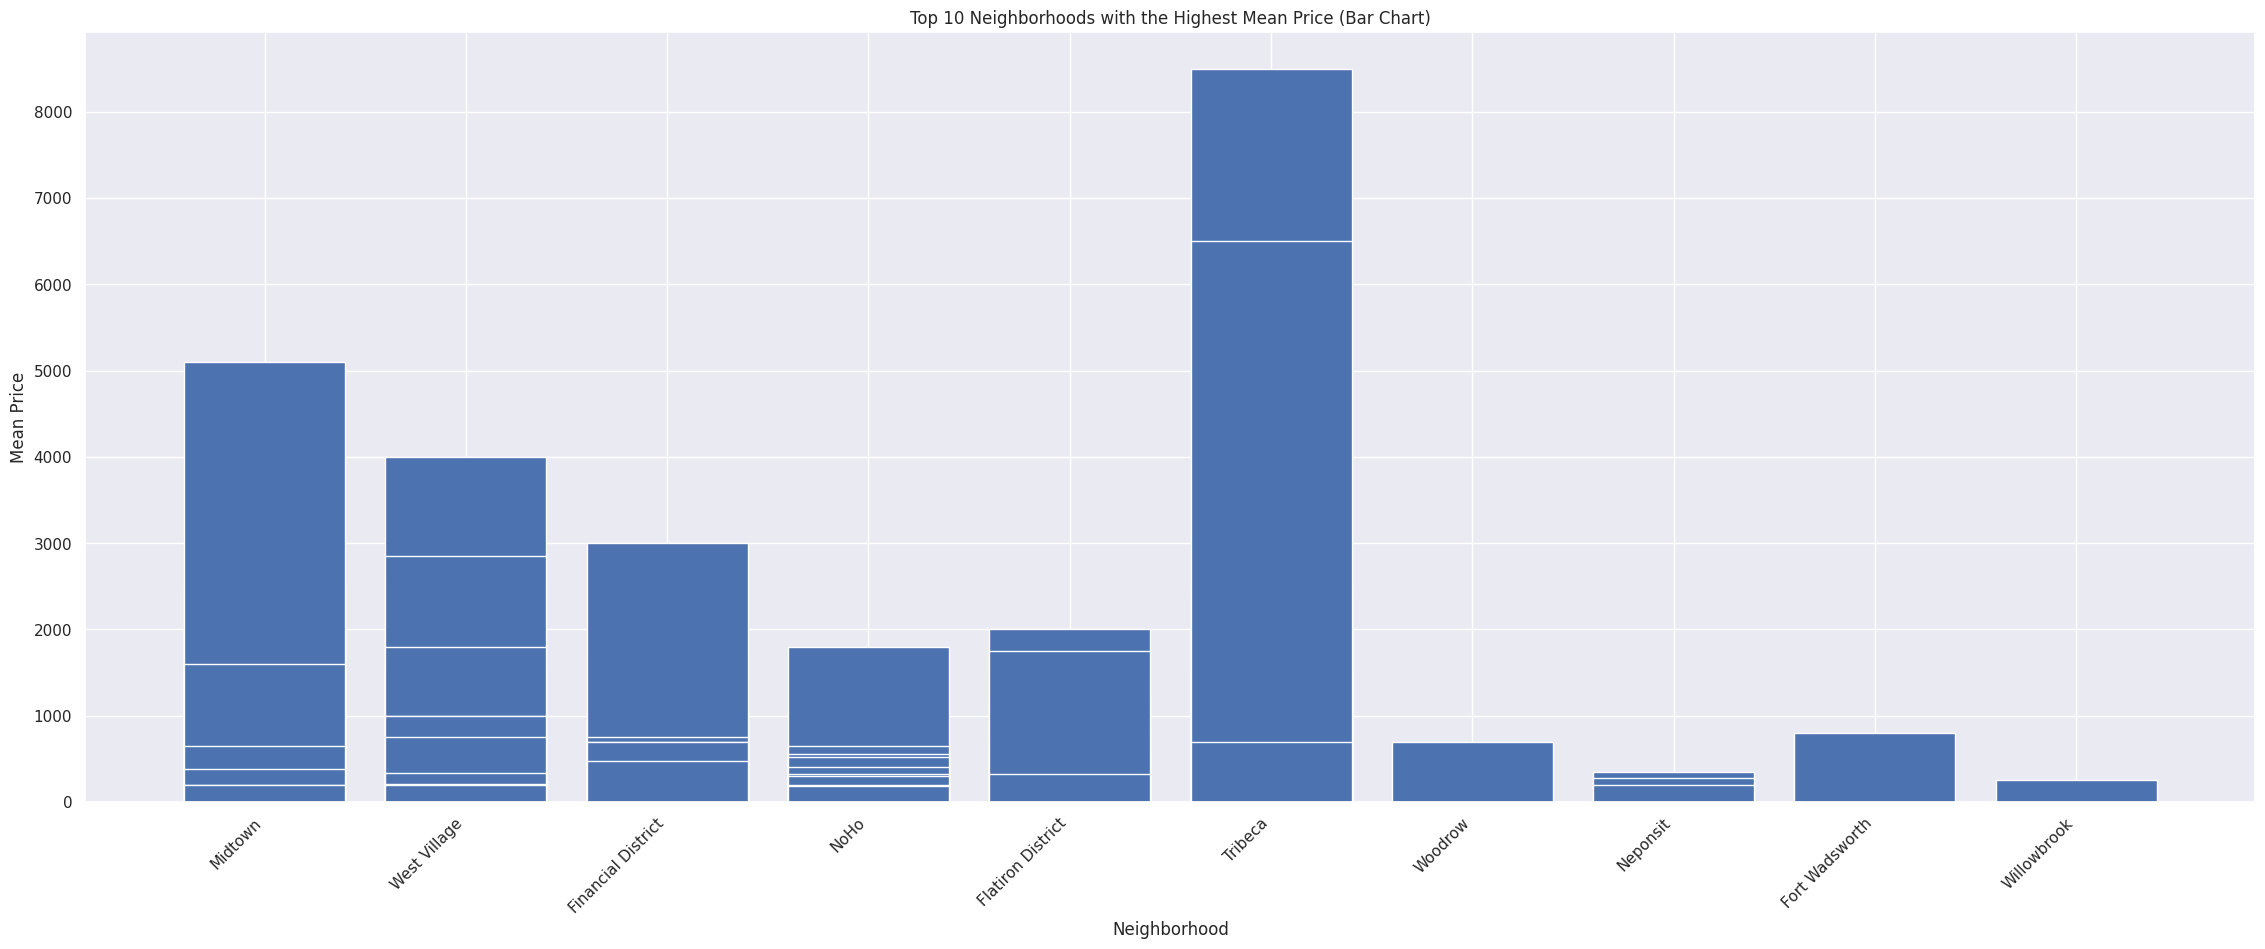

In [129]:

# Create the bar chart for the top N neighborhoods
plt.bar(df_top_neighborhoods['neighbourhood'], df_top_neighborhoods['price'])
plt.xlabel('Neighborhood')
plt.ylabel('Mean Price')
plt.title(f'Top {top_n} Neighborhoods with the Highest Mean Price (Bar Chart)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

3.10: Room Type Distribution by Neighborhood Group: Explore how the distribution of room types varies across different neighborhood groups. You can create a stacked bar chart to show the proportion of different room types within each neighborhood group.

<Figure size 1000x600 with 0 Axes>

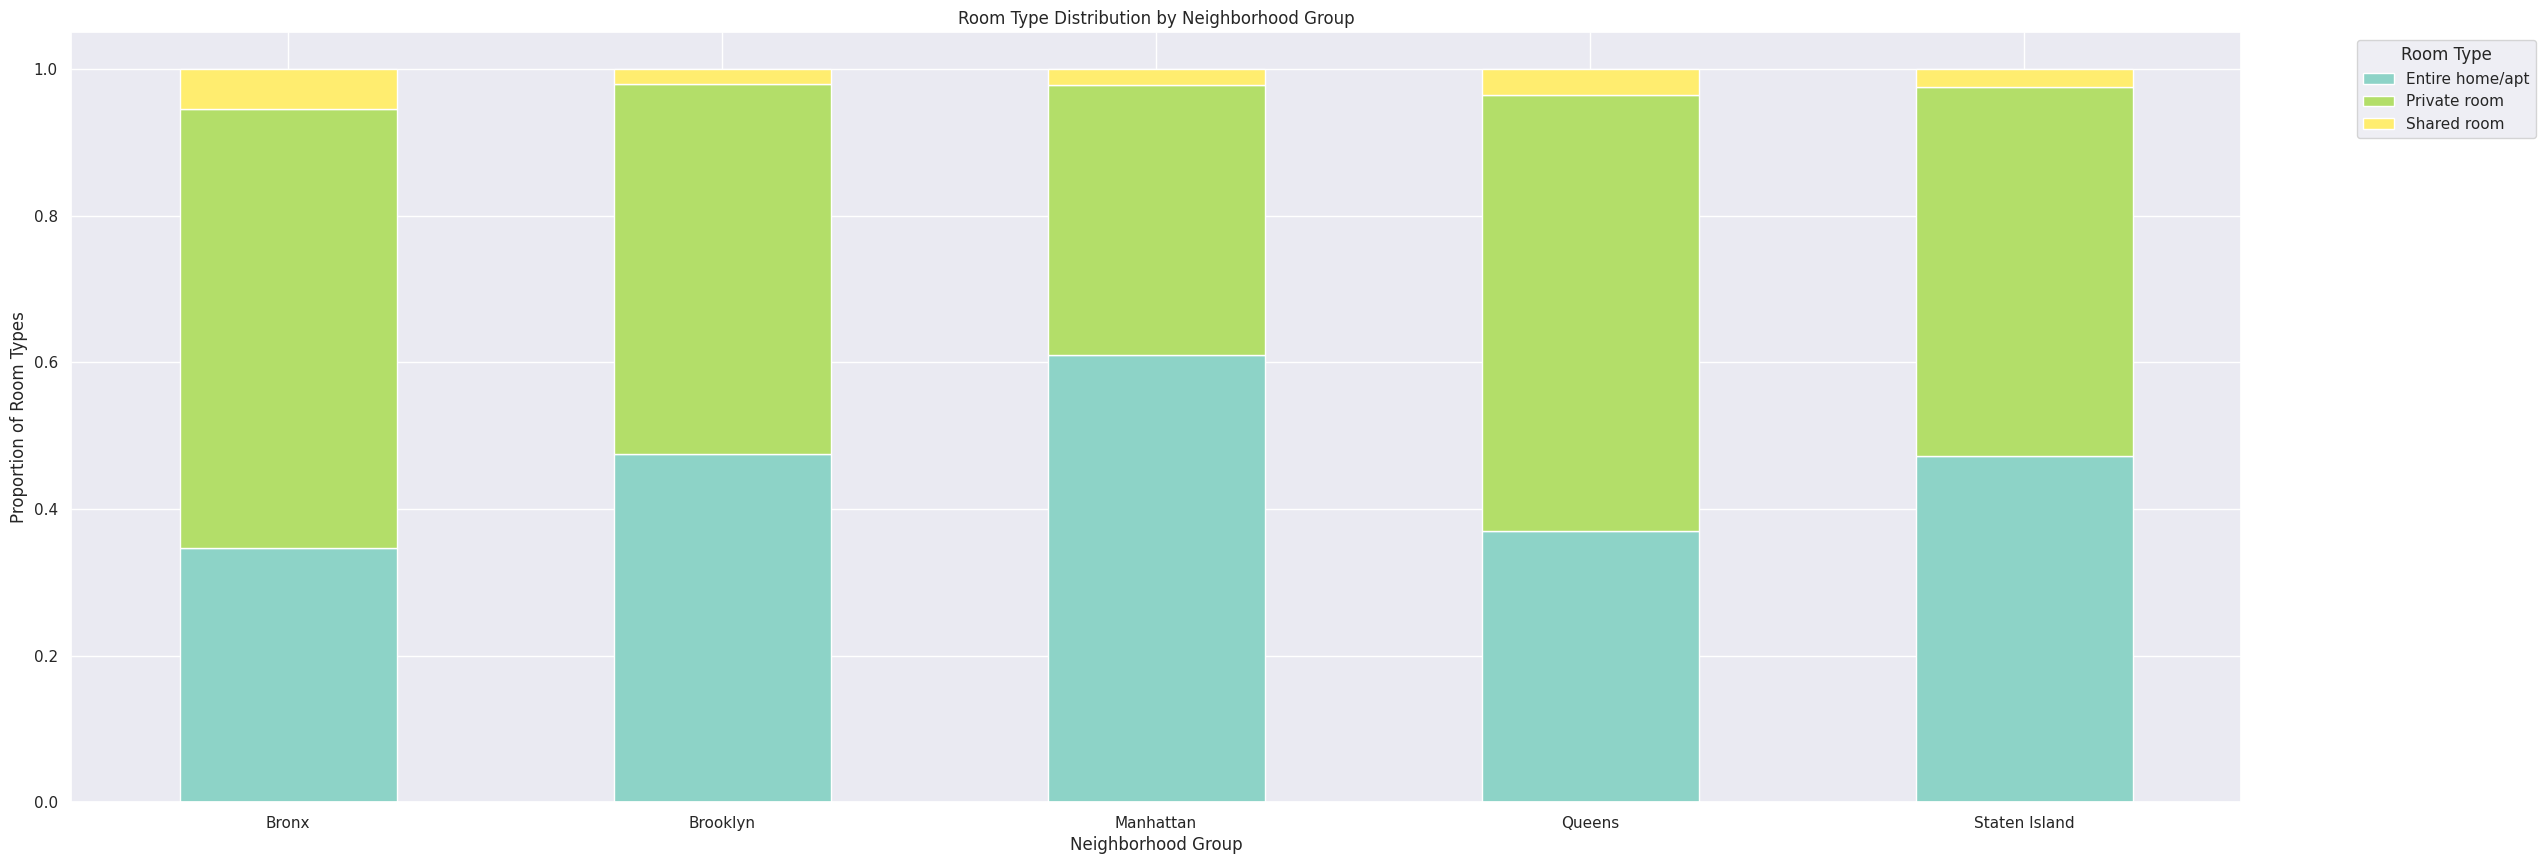

In [130]:
# Room Type Distribution by Neighborhood Group
room_type_distribution = df_cleaned.groupby(['neighbourhood_group', 'room_type']).size().unstack()

# Calculate the total listings in each neighborhood group
total_listings_by_group = df_cleaned['neighbourhood_group'].value_counts()

# Calculate the proportion of each room type within each neighborhood group
room_type_proportion = room_type_distribution.div(total_listings_by_group, axis=0)

# Plot Stacked Bar Chart
plt.figure(figsize=(10, 6))
room_type_proportion.plot(kind='bar', stacked=True, cmap='Set3')
plt.xlabel('Neighborhood Group')
plt.ylabel('Proportion of Room Types')
plt.title('Room Type Distribution by Neighborhood Group')
plt.xticks(rotation=0)
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

3.11: Host Characteristics and Reviews: Investigate if there are any correlations between the host's characteristics (e.g., 'host_name', 'host_id') and the number of reviews or average review scores they receive.

Correlation between Number of Reviews and Reviews per Month: 0.5496987706246337


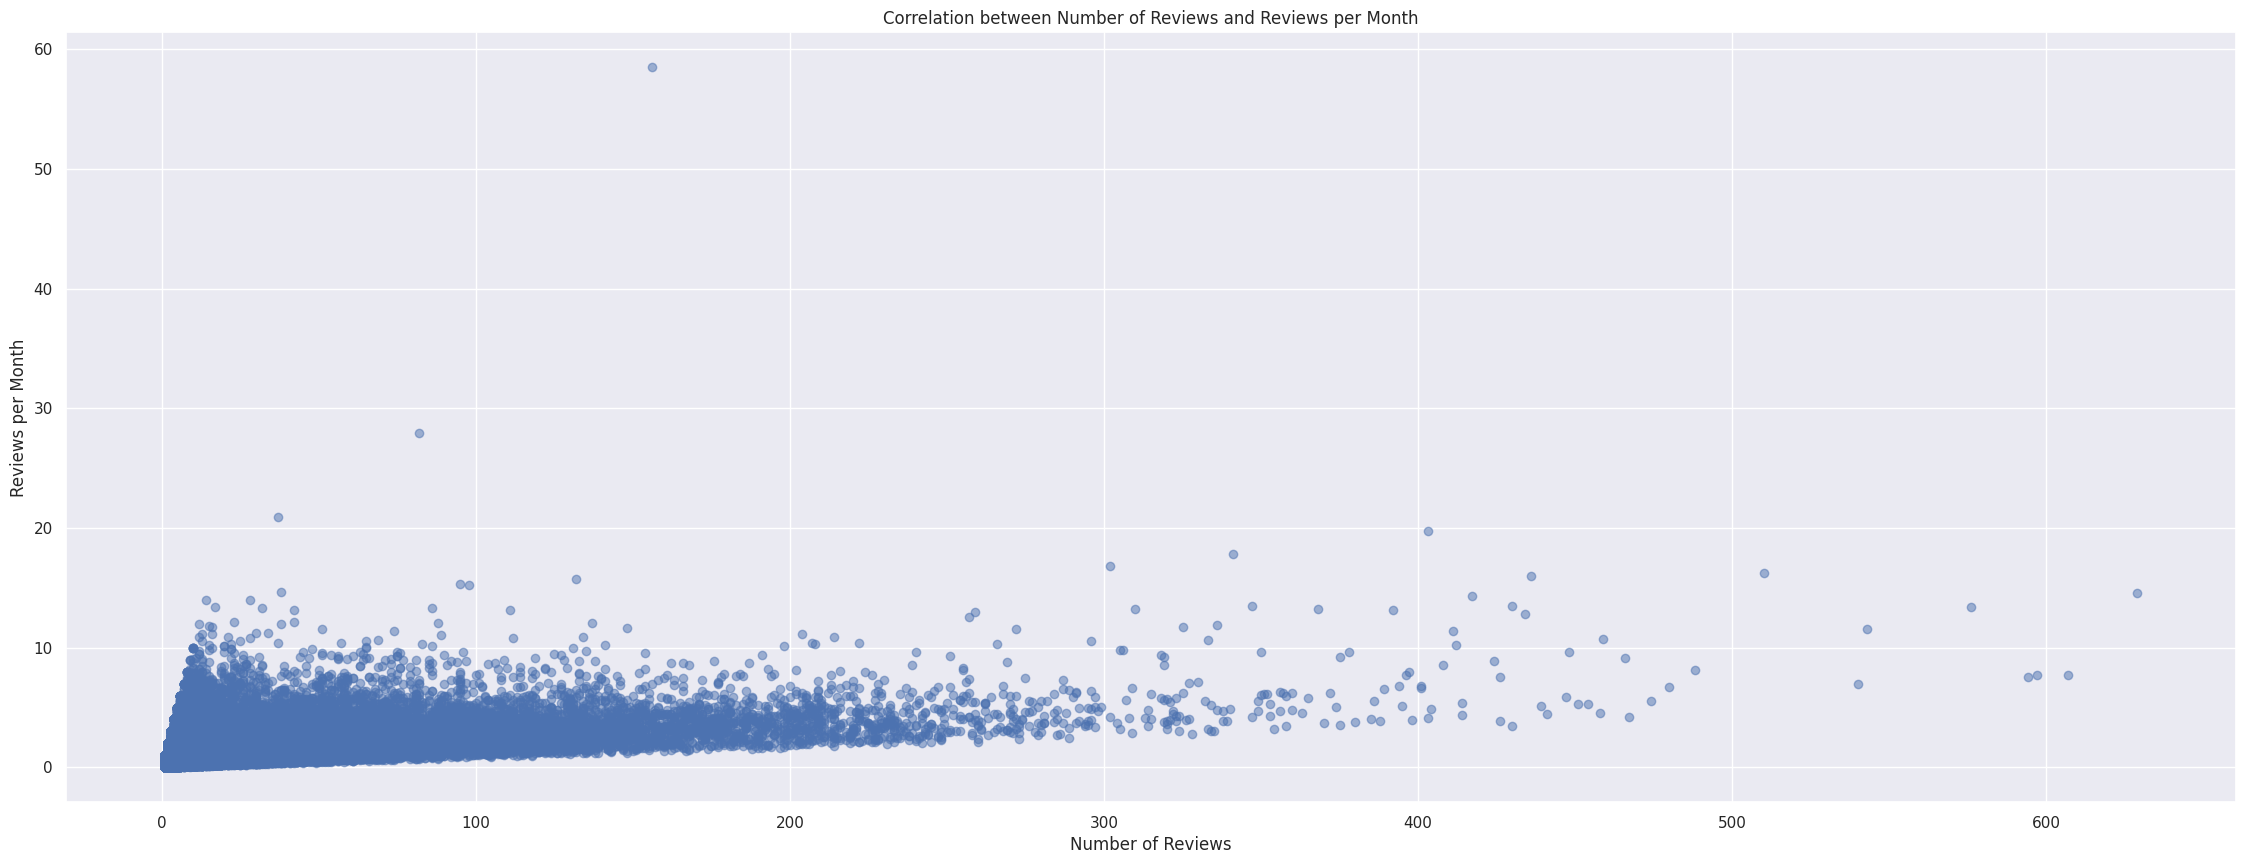

In [131]:
# Host Characteristics and Reviews Analysis
host_reviews_corr = df_cleaned[['host_name', 'host_id', 'number_of_reviews', 'reviews_per_month']].copy()

# Correlation between Number of Reviews and Reviews per Month
correlation = host_reviews_corr['number_of_reviews'].corr(host_reviews_corr['reviews_per_month'])
print("Correlation between Number of Reviews and Reviews per Month:", correlation)

# Visualize the Correlation
plt.scatter(host_reviews_corr['number_of_reviews'], host_reviews_corr['reviews_per_month'], alpha=0.5)
plt.xlabel('Number of Reviews')
plt.ylabel('Reviews per Month')
plt.title('Correlation between Number of Reviews and Reviews per Month')
plt.grid(True)
plt.show()

3.12: Popular Neighborhoods and Availability: Determine which neighborhoods have the highest demand and, consequently, the lowest availability of listings throughout the year.

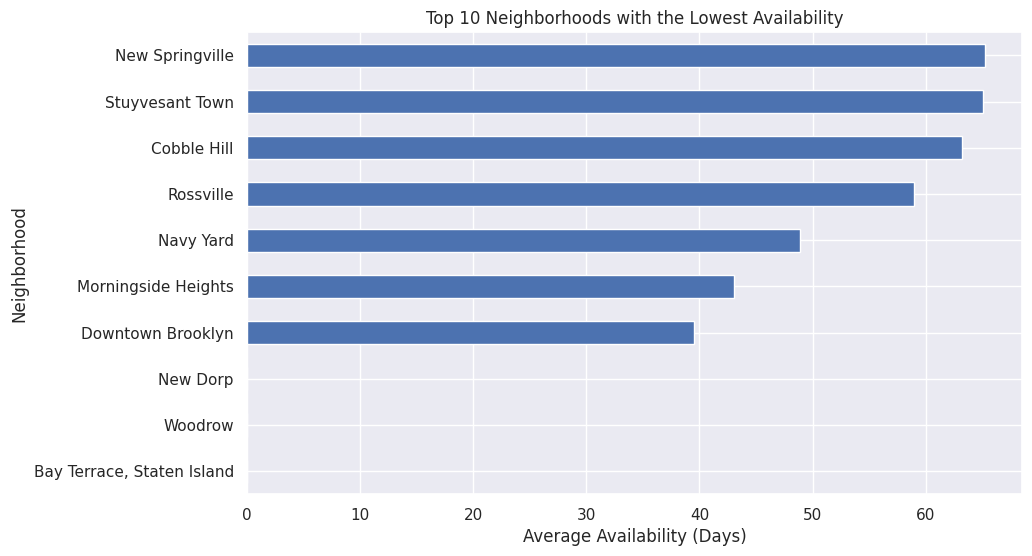

In [132]:
# Popular Neighborhoods and Availability Analysis
popular_neighborhoods = df_cleaned.groupby('neighbourhood')['availability_365'].mean()
popular_neighborhoods = popular_neighborhoods.sort_values(ascending=True)

# Top 10 Neighborhoods with the Lowest Availability
top_10_lowest_availability = popular_neighborhoods.head(10)

# Visualize Top 10 Neighborhoods with the Lowest Availability
top_10_lowest_availability.plot(kind='barh', figsize=(10, 6), color='b')
plt.xlabel('Average Availability (Days)')
plt.ylabel('Neighborhood')
plt.title('Top 10 Neighborhoods with the Lowest Availability')
plt.grid(True)
plt.show()

3.13: Price Trends Over Time: Analyze the trends in listing prices over time. You can use line plots to visualize how the prices change across different months or years.

In [133]:
average_price_per_month = df_cleaned.groupby(df_cleaned['last_review'].dt.to_period('M'))['price'].mean()
average_price_per_year = df_cleaned.groupby(df_cleaned['last_review'].dt.to_period('Y'))['price'].mean()


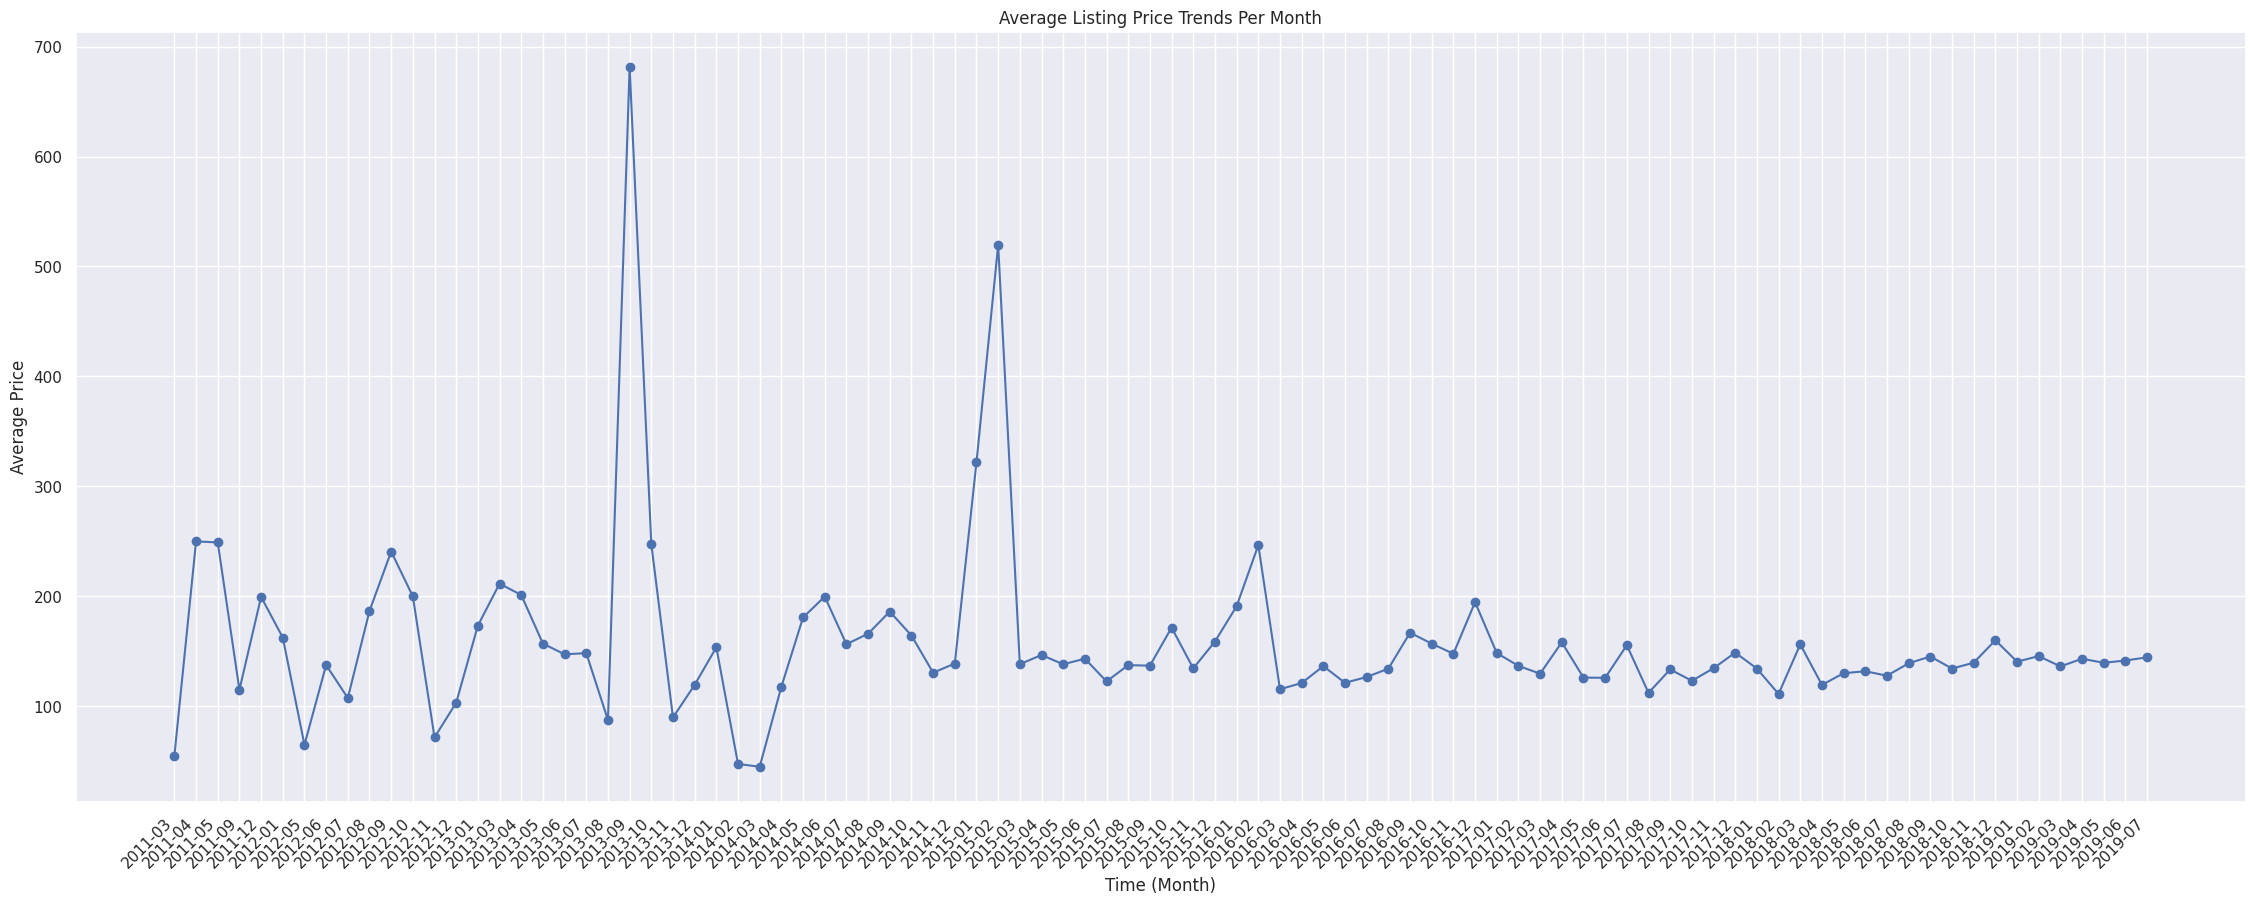

In [134]:
# Plot the average price per month

plt.plot(average_price_per_month.index.astype(str), average_price_per_month.values, marker='o', linestyle='-', color='b')
plt.xlabel('Time (Month)')
plt.ylabel('Average Price')
plt.title('Average Listing Price Trends Per Month')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.show()

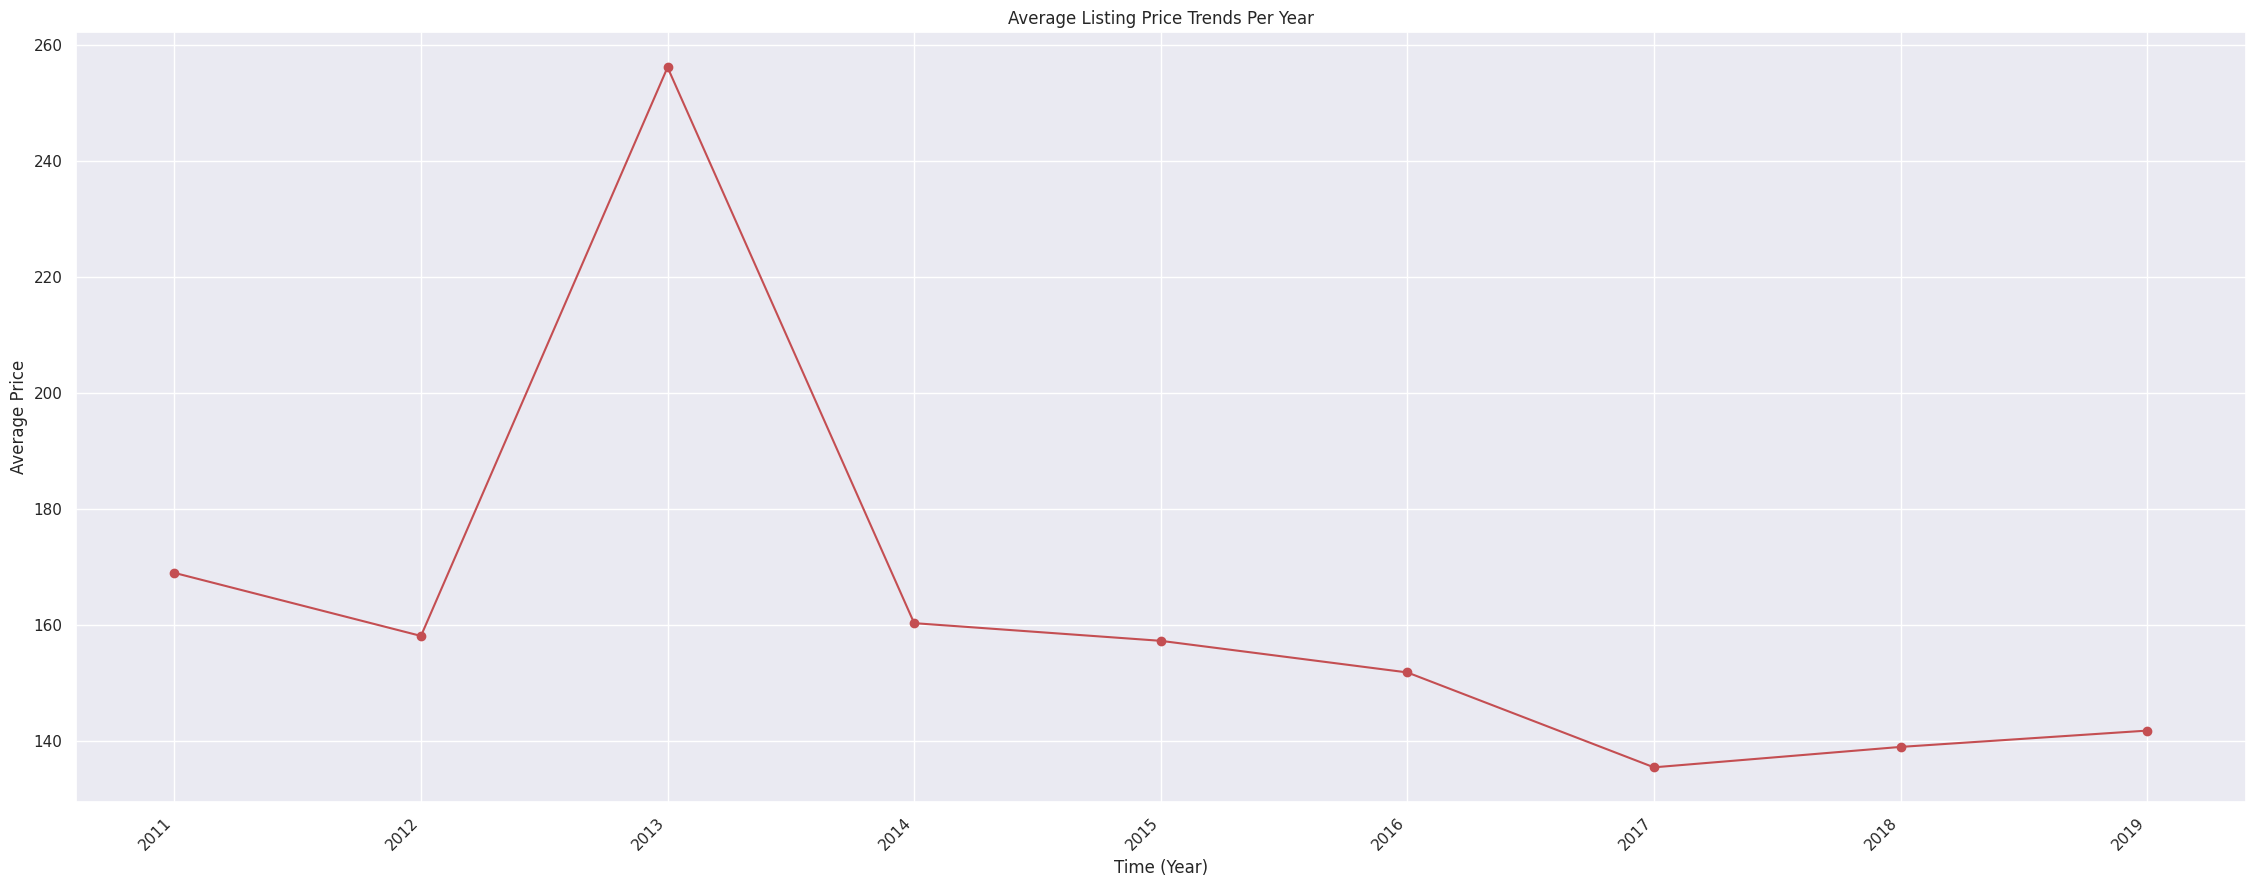

In [135]:
# Plot the average price per year
plt.plot(average_price_per_year.index.astype(str), average_price_per_year.values, marker='o', linestyle='-', color='r')
plt.xlabel('Time (Year)')
plt.ylabel('Average Price')
plt.title('Average Listing Price Trends Per Year')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.show()

3.14: Reviews over Time: Investigate if there are any trends in the number of reviews or review scores over time. You can use line plots to visualize the temporal patterns.

3.15:Price and Availability Relationship: Explore if there is any relationship between listing prices and availability. For example, do listings with higher prices tend to have lower availability?

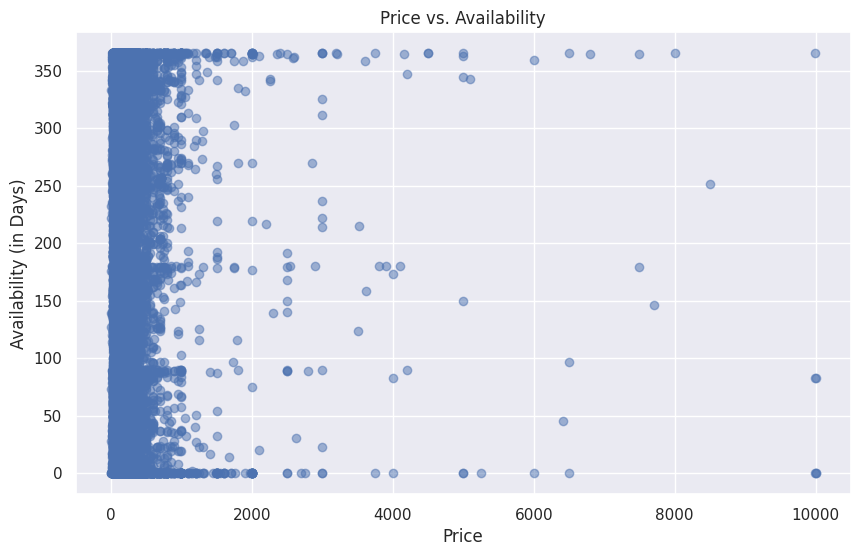

In [136]:
# Step 1: Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['price'], df_cleaned['availability_365'], alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Availability (in Days)')
plt.title('Price vs. Availability')
plt.grid(True)

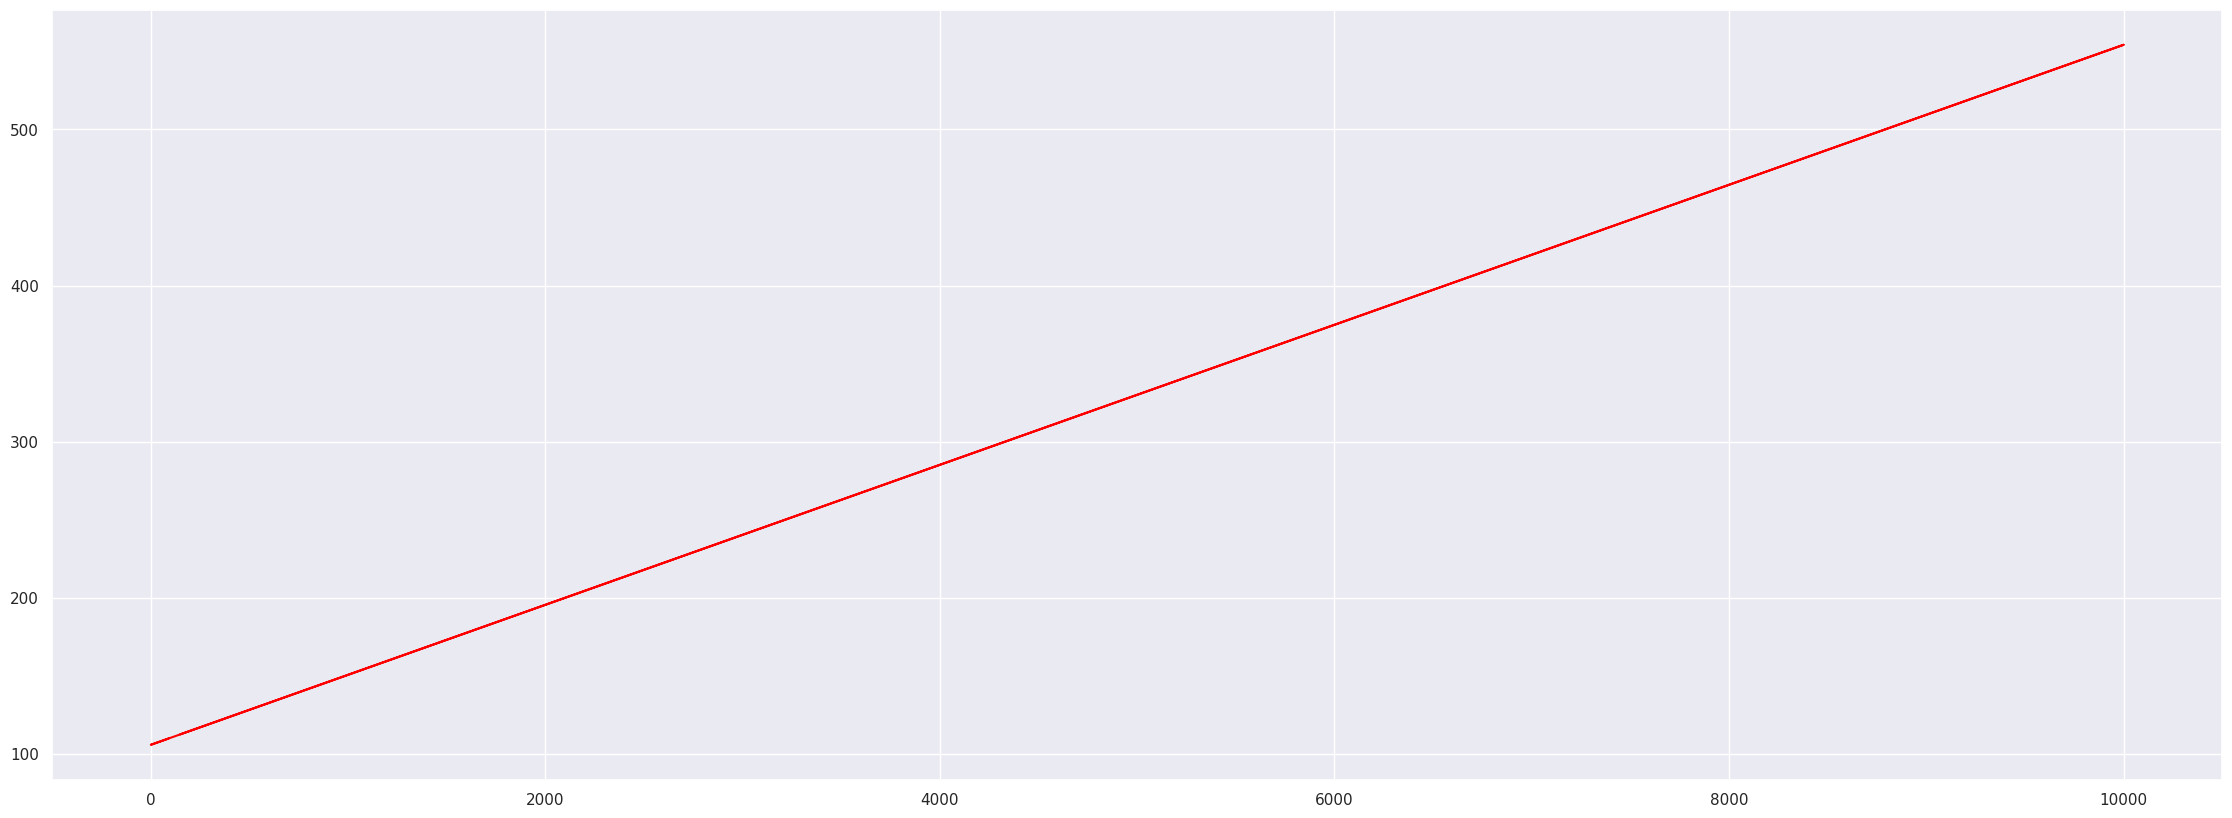

In [137]:
x = df_cleaned['price']
y = df_cleaned['availability_365']
b, m = polyfit(x, y, 1)
plt.plot(x, b + m * x, '-', color='red')

# Step 3: Display the scatter plot
plt.show()

3.16: Room Type and Availability: Analyze how the availability of listings varies based on the room type (e.g., Entire home/apt, Private room, Shared room).

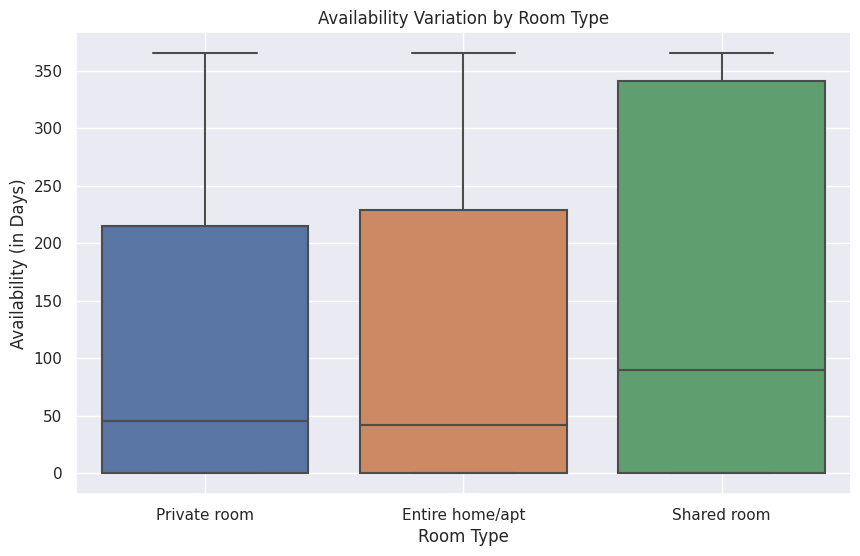

In [138]:
#Create a box plot or violin plot to visualize the distribution of availability for each room type.
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='availability_365', data=df_cleaned)
plt.xlabel('Room Type')
plt.ylabel('Availability (in Days)')
plt.title('Availability Variation by Room Type')
plt.grid(True)

#Display the plot
plt.show()

3.17: Length of Stay: Investigate the distribution of minimum nights required for booking ('minimum_nights') and identify any patterns related to booking durations.

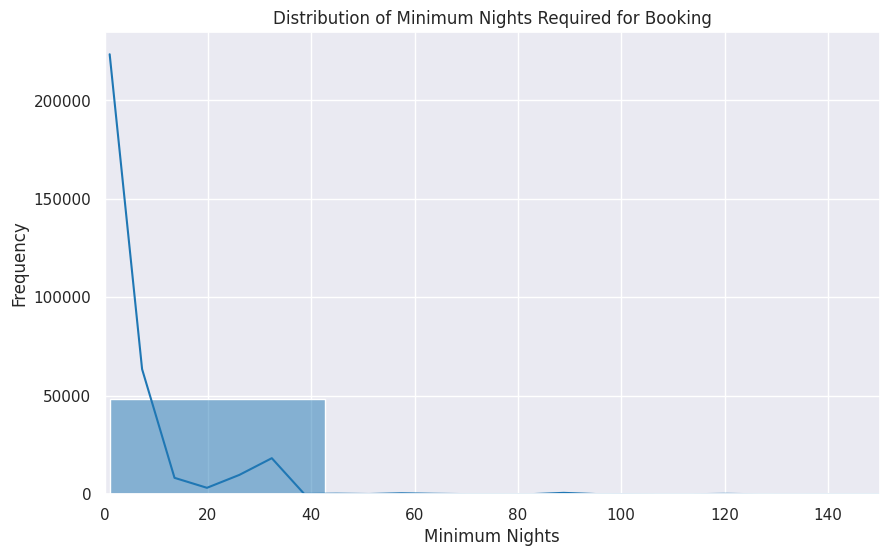

In [139]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['minimum_nights'], bins=30, kde=True, color='#1f77b4')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')
plt.title('Distribution of Minimum Nights Required for Booking')
plt.grid(True)

# Set appropriate x-axis limits
plt.xlim(0, 150) #it s looks empty after that so ı set 150 for minimun nights

# Step 2: Display the plot
plt.show()

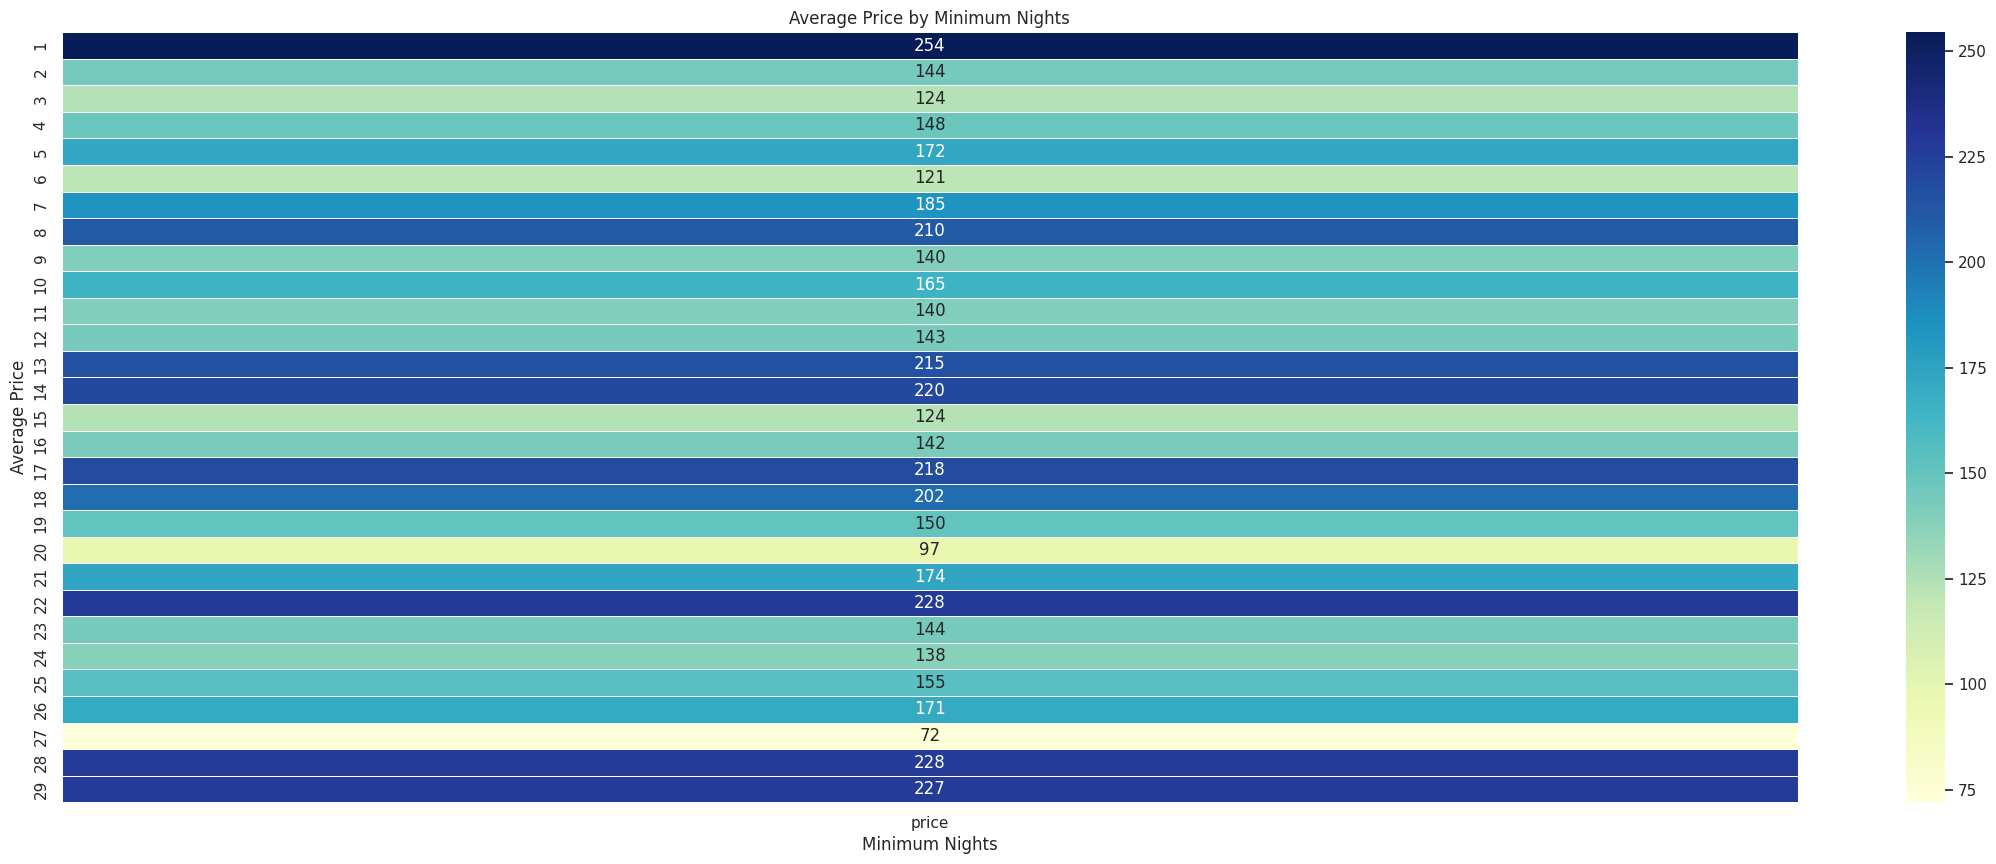

In [140]:
# This is just a sample data for demonstration purposes
data = {
    'minimum_nights': np.random.randint(1, 30, 100),  # Random integers from 1 to 30
    'price': np.random.randint(50, 300, 100),        # Random integers from 50 to 300
}
df = pd.DataFrame(data)

# Create a pivot table to aggregate the average price for each minimum_nights value
pivot_table = df.pivot_table(index='minimum_nights', values='price', aggfunc='mean')

# Create the heatmap using seaborn's heatmap function
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=0.5)
plt.xlabel('Minimum Nights')
plt.ylabel('Average Price')
plt.title('Average Price by Minimum Nights')
plt.show()

3.18: Outlier Analysis: Revisit the outlier analysis performed earlier to identify any unique patterns or characteristics of listings that fall outside the typical range of values.

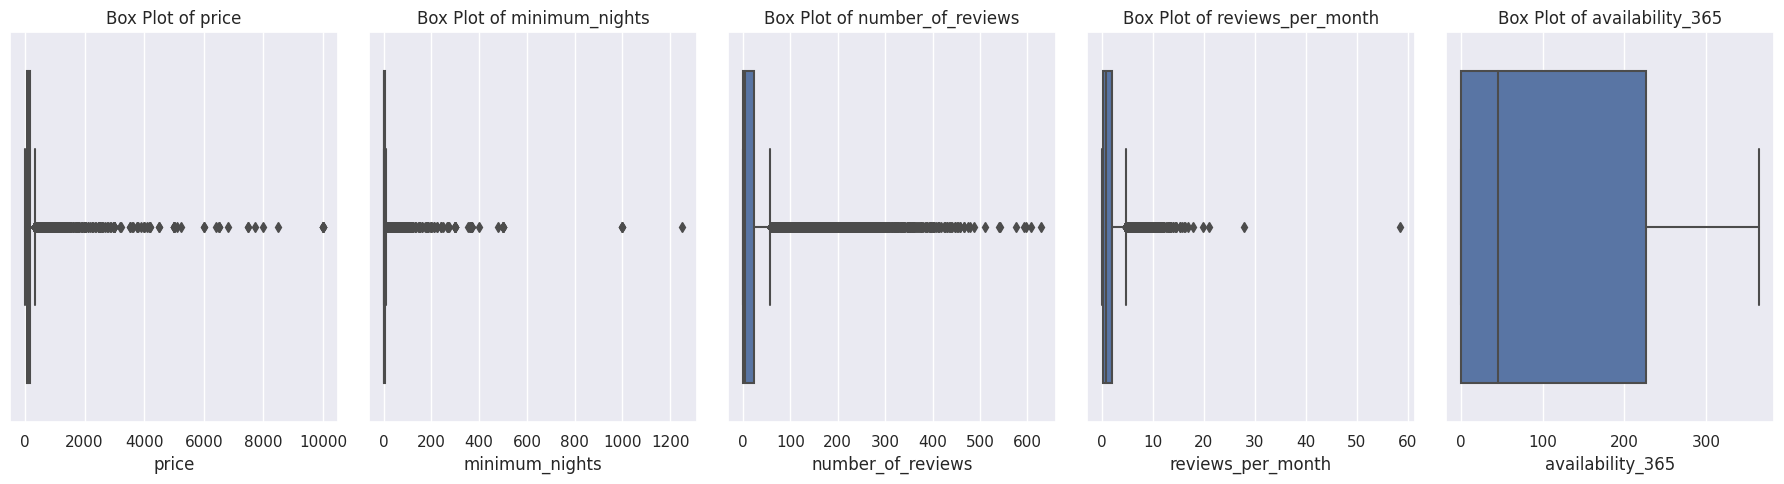

In [141]:
# Columns for outlier analysis
outlier_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']

#Create subplots for each column
fig, axes = plt.subplots(nrows=1, ncols=len(outlier_columns), figsize=(18, 5))

#Visualize the distribution using box plots
for i, col in enumerate(outlier_columns):
    sns.boxplot(x=df_cleaned[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel(col)

#Display the box plots
plt.tight_layout()
plt.show()

3.19: create a pie chart to visualize the distribution of room types in the Airbnb listings.

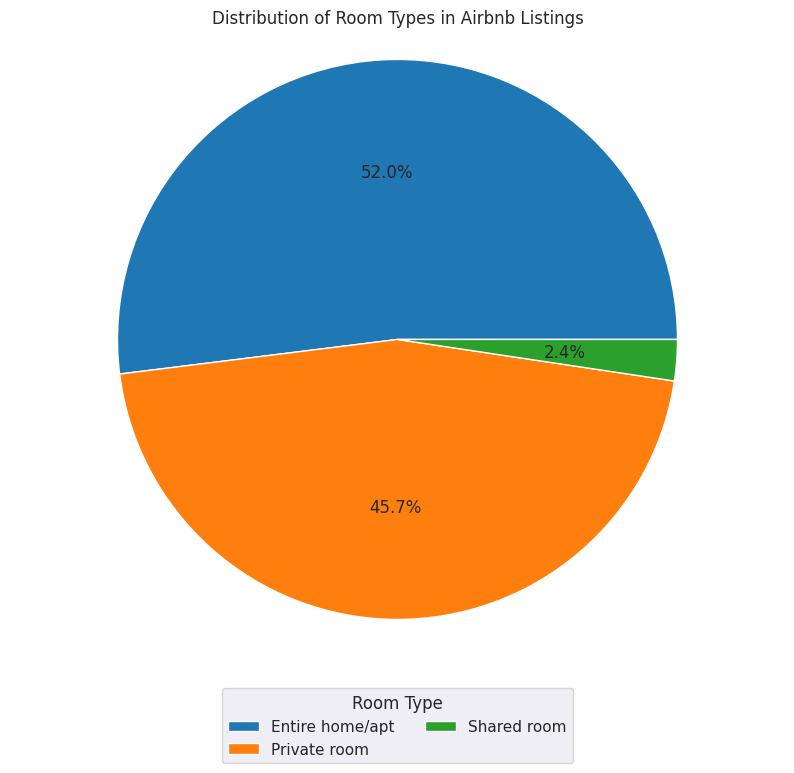

In [142]:
#Calculate the Proportions
room_type_counts = df_cleaned['room_type'].value_counts()
total_listings = len(df_cleaned)
proportions = room_type_counts / total_listings

# Create the Pie Chart
plt.figure(figsize=(10, 8))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
plt.pie(proportions, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Room Types in Airbnb Listings')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.

# Create the Legend
plt.legend(title='Room Type', labels=proportions.index, loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2)

plt.show()

3.20: create a histogram with a KDE curve showing the distribution of listing prices in your dataset.

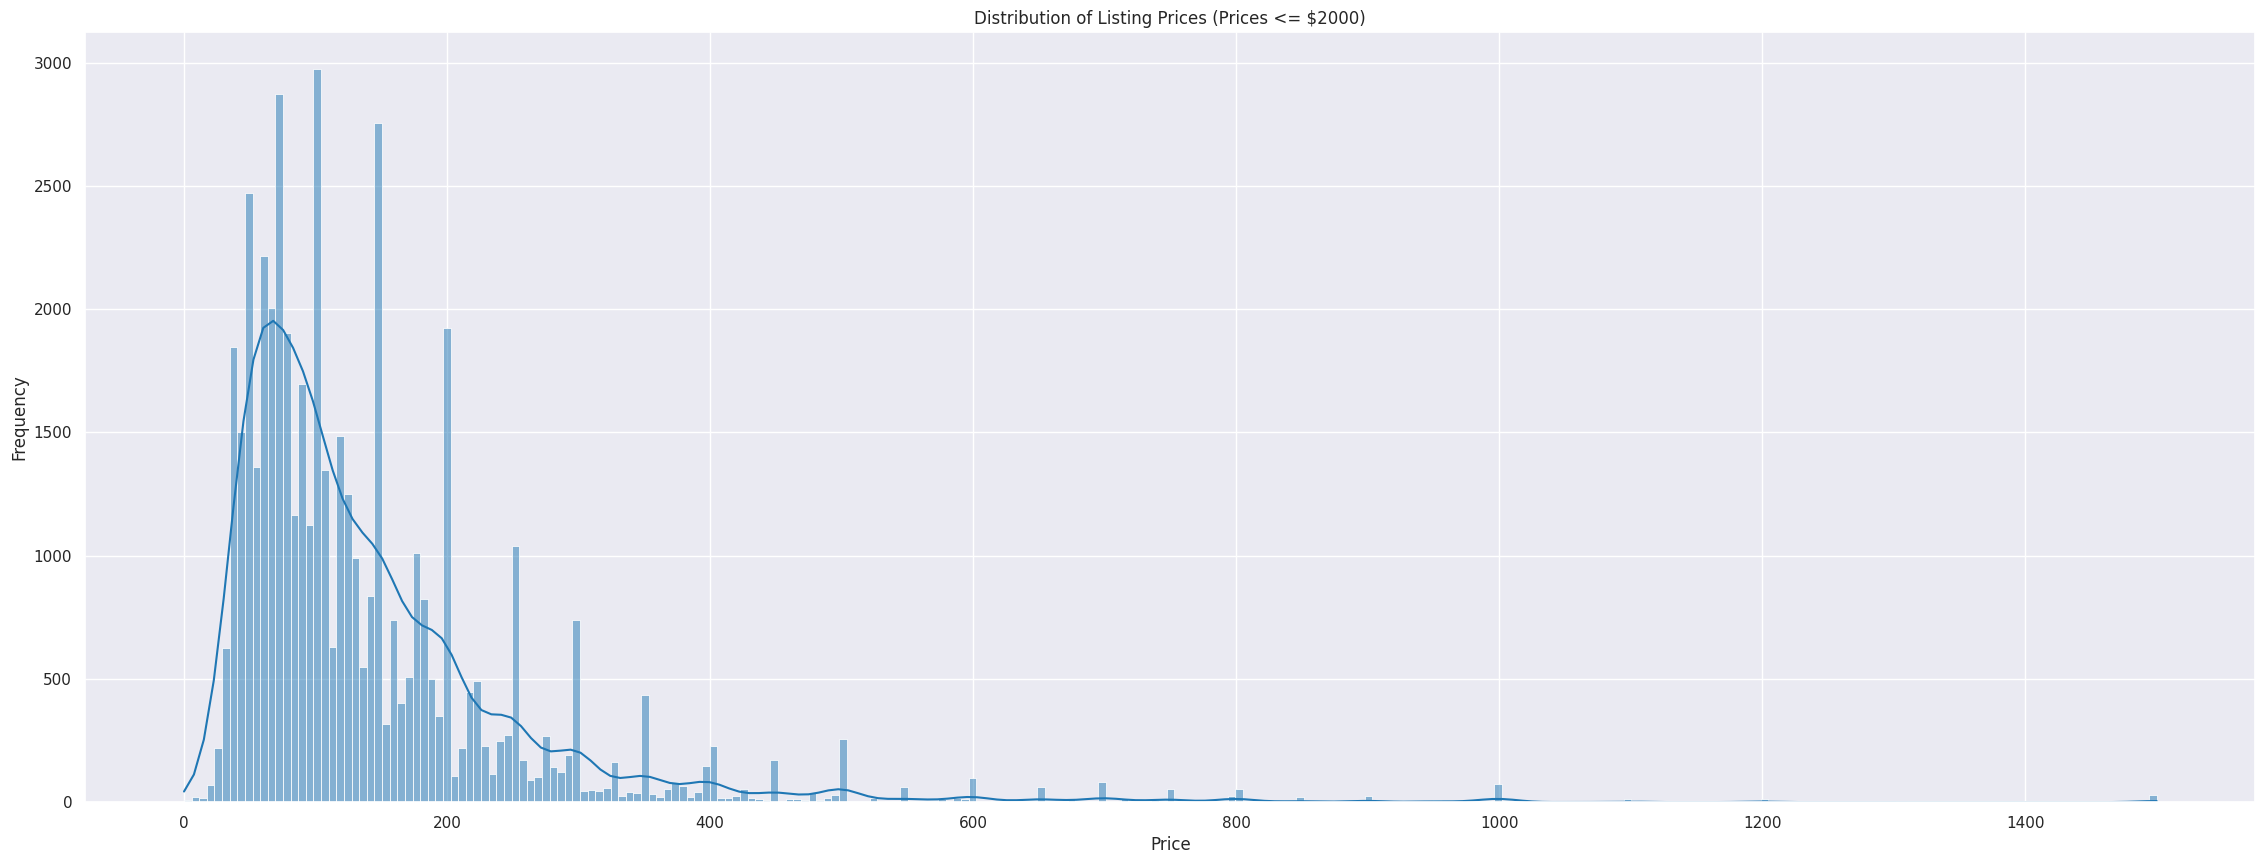

In [143]:
# Filter prices greater than $1500
filtered_df = df_cleaned[df_cleaned['price'] <= 1500]

# Plot the histogram with KDE
sns.histplot(filtered_df['price'], kde=True, color='#1f77b4')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Listing Prices (Prices <= $2000)')
plt.grid(True)

# Display the plot
plt.show()

 3.21: determine the month of each review and then calculate the cumulative sum of reviews for each month.

In [ ]:
df_cleaned['review_month'] = df_cleaned['last_review'].dt.to_period('M')

# Sort the DataFrame by 'last_review'
df_cleaned.sort_values('last_review', inplace=True)

# Group the data by 'review_month' and calculate the cumulative sum of 'number_of_reviews' for each month
cumulative_reviews = df_cleaned.groupby('review_month')['number_of_reviews'].cumsum()

# Create the Area Plot
plt.figure(figsize=(12, 6))
plt.fill_between(cumulative_reviews.index.astype(str), cumulative_reviews, color='b', alpha=0.4)
plt.plot(cumulative_reviews.index.astype(str), cumulative_reviews, marker='o', linestyle='-', color='b')
plt.xlabel('Time (Month)')
plt.ylabel('Cumulative Number of Reviews')
plt.title('Cumulative Number of Reviews Over Time')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.show()